In [183]:
# coffee data summary

In [2]:
from sklearn.decomposition import PCA
import numpy as np
from pandas import DataFrame 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import FastICA
from sklearn.manifold import TSNE 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import LocallyLinearEmbedding
from sklearn import manifold 
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split

In [3]:
# here we read in the data

In [4]:
Y=np.loadtxt('Reflection2_00001.txt').T[0,]
np.savetxt('Class',Y)
Y=np.loadtxt('Class')
X=pd.read_csv('Coffee.csv')
X=X[40:890]
Y[300],Y[1600]

(325.441, 865.397)

In [5]:
# then for x1-x9, we calculate the mean and the sigma=variance^0.5 in each group(class1,class2,...class9, but class6, class7 are empty)
# then we plot charts to see them

In [6]:
x=np.std(X,axis=0)
x_mean=np.mean(X,axis=0)
X_1=np.vstack((X[120:180],X[190:220],X[520:560],X[570:640]))
x1=np.std(X_1,axis=0)
x1_mean=np.mean(X_1,axis=0)
X_2=np.vstack((X[220:260],X[290:360],X[400:490]))
x2=np.std(X_2,axis=0)
x2_mean=np.mean(X_2,axis=0)
X_3=np.vstack((X[260:290],X[360:400],X[490:520]))
x3=np.std(X_3,axis=0)
x3_mean=np.mean(X_3,axis=0)
X_4=np.vstack((X[640:760],X[770:800]))
x4=np.std(X_4,axis=0)
x4_mean=np.mean(X_4,axis=0)
X_5=X[800:850]
x5=np.std(X_5,axis=0)
x5_mean=np.mean(X_5,axis=0)
X_8=X[10:30]
x8=np.std(X_8,axis=0)
x8_mean=np.mean(X_8,axis=0)
X_9=X[40:50]
x9=np.std(X_9,axis=0)
x9_mean=np.mean(X_9,axis=0)

In [7]:
# first for all the samples,and the samples in each class,let us see the sigma,we can find the data of begining and the end 
# are very large. these data must have some problems(too noisy), so wavelength less than 200nm and wavelength larger than 1000nm 
# are quite bad,so I must remove them.

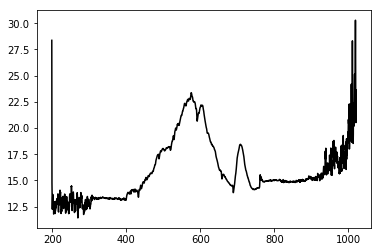

In [8]:
plt.plot(Y[23:2030],x[23:2030],color="black")

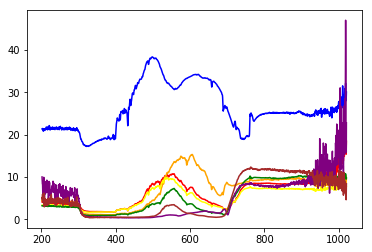

In [9]:
plt.plot(Y[30:2030],x1[30:2030],color="red")
plt.plot(Y[30:2030],x2[30:2030],color="orange")
plt.plot(Y[30:2030],x3[30:2030],color="yellow")
plt.plot(Y[30:2030],x4[30:2030],color="green")
plt.plot(Y[30:2030],x5[30:2030],color="blue")
plt.plot(Y[30:2030],x8[30:2030],color="purple")
plt.plot(Y[30:2030],x9[30:2030],color="brown")

In [10]:
# then we see the mean of all the samples and the samples in each classes, in different wavelength.
# we can find in some wavelength, 200-300nm and 900-1000nm, although the value under almost the same wavelength, for example,
# 201nm and 201.5nm, the value should be almost the same. But for the plot, we can see the at almost the same wavelength,
# the value we get can be a little different. So I think the data here is noisy too, this noisy is mainly for the wavelength.
# In order to get a better result, I think I can remove these data.
# in a word, I think the wavelength around 300nm-900nm can be a good chioce, now I just choose the wavelength roughly in 325nm-865nm.
# (so we can keep one thousand and three hundred dimensions)

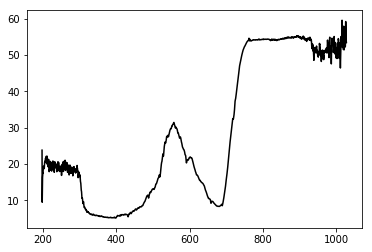

In [11]:
plt.plot(Y[22:2050],x_mean[22:2050],color="black")

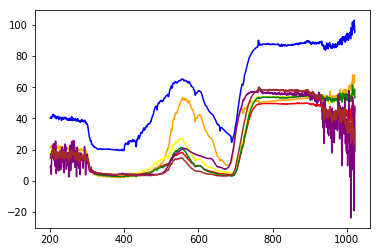

In [12]:
plt.plot(Y[30:2030],x1_mean[30:2030],color="red")
plt.plot(Y[30:2030],x2_mean[30:2030],color="orange")
plt.plot(Y[30:2030],x3_mean[30:2030],color="yellow")
plt.plot(Y[30:2030],x4_mean[30:2030],color="green")
plt.plot(Y[30:2030],x5_mean[30:2030],color="blue")
plt.plot(Y[30:2030],x8_mean[30:2030],color="purple")
plt.plot(Y[30:2030],x9_mean[30:2030],color="brown")

In [13]:
x=X.T
X_n=x[300:1600].T
X_n.shape

(850, 1300)

In [14]:
# first we should reduce the dimension, it have some benefits:
# make the codes runs faster, reduce the noisy and most of the time can improve the classifier effect.
# so I think reduce the dimension(deal with features) is a necessary step.

# since there are some unlabeled data, so LDA is not very suitable. LDA is used for the labeled data.
# So I choose to use unsupervised learning to reduce dimension.
# By the unsupervised learning methods, we can also mark the unlabeled data using the model we find in our work.

In [15]:
# PCA and ICA are two linear methods, PCA is a very common method and ICA is a improvement of it, so I consider both of them.
# for the choose of dimension, we just first choose 10, although it may not the best, it can be a nice try and I also improve this 
# in our later work.(in fact, after 10 dimension, the model effect just have a little change by our trying)
# the choose of dimension can just have a little improvement after 10, so we can considr to improve this after we find the best model.

In [16]:
pca=PCA(n_components=0.99)
X_PCA=pca.fit_transform(X_n)
ICA = FastICA(n_components=10,random_state=40) 
X_ICA=ICA.fit_transform(X_n)
X_PCA.shape

(850, 5)

In [17]:
# t-SNE and lle are nonlinear methods, if the data are noisy in a range, the lle can keep the most characteristics, so in this 
# condithion, PCA and ICA is not good, we can use lle.
# but here we have remove the noisy data, the lle may loss its benefits.

In [18]:
X_tsne = TSNE(n_components=3, n_iter=500).fit_transform(X_n)
lle=LocallyLinearEmbedding(n_components=10,n_neighbors=40)
X_lle=lle.fit_transform(X_n)

In [19]:
# here we set the target.

In [20]:
from numpy import array

In [21]:
# first use 1,2,3,...to present the different class:
# "1": health good
# "2": rust
# "3": infected green canopy
# "4": geisha
# "5": geisha cannopy
# "6": yellow
# "7": yellow green
# "8": Young_Rust_Yellow
# "9": Young_Rust_Green_Leaf

target_labeled=array(["8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","9","9","9","9","9","9","9","9",
                      "9","9","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1",
             "1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1",
             "1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1",
             "1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","2","2","2","2","2","2","2","2","2","2",
             "2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2",
             "3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3",
             "2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2",
             "2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2",
             "2","2","2","2","2","2","2","2","2","2","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3",
             "3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","2","2","2","2","2","2","2","2","2","2",
             "2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2",
             "2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2",
             "2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","2","3","3","3","3","3","3","3","3","3","3",
             "3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","3","1","1","1","1","1","1","1","1","1","1",
             "1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1",
             "1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1",
             "1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1",
             "1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","1","4","4","4","4","4","4","4","4","4","4",
             "4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4",
             "4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4",
             "4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4",
             "4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4",
             "4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4","4",
             "5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5",
             "5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5"])
len(target_labeled)

730

In [22]:
np.savetxt('New_X',X_n)
np.savetxt("PCA",X_PCA)
np.savetxt("ICA",X_ICA)
np.savetxt("LLE",X_lle)
np.savetxt('TSNE',X_tsne)
X_new=np.loadtxt('New_X')
X_Pca=np.loadtxt("PCA")
X_ICA=np.loadtxt("ICA")
X_lle=np.loadtxt("LLE")
X_tsne=np.loadtxt("TSNE")

In [23]:
# reset the data for the labeled and unlabeled data

In [24]:
X_tsne_labeled=np.vstack((X_tsne[10:30],X_tsne[40:50],X_tsne[120:180],X_tsne[190:560],X_tsne[570:760],X_tsne[770:850]))
X_tsne_unlabeled=np.vstack((X_tsne[0:10],X_tsne[30:40],X_tsne[50:120],X_tsne[180:190],X_tsne[560:570],X_tsne[760:770]))
X_Pca_labeled=np.vstack((X_Pca[10:30],X_Pca[40:50],X_Pca[120:180],X_Pca[190:560],X_Pca[570:760],X_Pca[770:850]))
X_Pca_unlabeled=np.vstack((X_Pca[0:10],X_Pca[30:40],X_Pca[50:120],X_Pca[180:190],X_Pca[560:570],X_Pca[760:770]))
X_ICA_labeled=np.vstack((X_ICA[10:30],X_ICA[40:50],X_ICA[120:180],X_ICA[190:560],X_ICA[570:760],X_ICA[770:850]))
X_ICA_unlabeled=np.vstack((X_ICA[0:10],X_ICA[30:40],X_ICA[50:120],X_ICA[180:190],X_ICA[560:570],X_ICA[760:770]))
X_lle_labeled=np.vstack((X_lle[10:30],X_lle[40:50],X_lle[120:180],X_lle[190:560],X_lle[570:760],X_lle[770:850]))
X_lle_unlabeled=np.vstack((X_lle[0:10],X_lle[30:40],X_lle[50:120],X_lle[180:190],X_lle[560:570],X_lle[760:770]))
X_labeled=np.vstack((X_new[10:30],X_new[40:50],X_new[120:180],X_new[190:560],X_new[570:760],X_new[770:850]))
X_unlabeled=np.vstack((X_new[0:10],X_new[30:40],X_new[50:120],X_new[180:190],X_new[560:570],X_new[760:770]))

X.shape,X_labeled.shape

((850, 2048), (730, 1300))

In [25]:
# in this part just see roughly the classification effect, split the train and test data
x_train, x_test, y_train, y_test = train_test_split(X_labeled,target_labeled, test_size=0.3)
xpca_train, xpca_test, ypca_train, ypca_test = train_test_split(X_Pca_labeled,target_labeled, test_size=0.3)
xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA_labeled,target_labeled, test_size=0.3)
xlle_train, xlle_test, ylle_train, ylle_test = train_test_split(X_lle_labeled,target_labeled, test_size=0.3)
xtsne_train, xtsne_test, ytsne_train, ytsne_test = train_test_split(X_tsne_labeled,target_labeled, test_size=0.3)

In [26]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score

In [184]:
# accuracy= predict right/ all samples.
# kappa and F1 score are used to estimate the accuracy in each class.

In [27]:
# there are some kinds of machine learning models, like, netural network, tree model(can be improved by ensemble), svm model, naivebayes,
# knn(unsupervised machine learning, classify the unlabeled samples, not suitable for my data), logistic regression clasifier( good but
# this model should classifier the positive data),but after reduce the dimension, the data can be negative, so the logistic regression 
# classifier may not a good choice.
# other models are just the improvement based on these models, like adding boosting or bagging.
# so we just cinsider four main kinds of models: svm, decision tree, naive bayes,netural network.

In [28]:
# first let us see the naive bayes model

In [29]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print ('accuracy_train：', accuracy_score(y_train, gnb.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, gnb.predict(x_test)))

print ('Kappa_train：', cohen_kappa_score(y_train, gnb.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, gnb.predict(x_test)))
print ('F1_train：', f1_score(y_train, gnb.predict(x_train),average='weighted'))
print ('F1_test：', f1_score(y_test, gnb.predict(x_test),average='weighted'))

accuracy_train： 0.5792563600782779
accuracy_test： 0.5844748858447488
Kappa_train： 0.4769155323211114
Kappa_test： 0.49025475751995085
F1_train： 0.5234404431150506
F1_test： 0.5535280828534895


In [30]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
print ('accuracy_train：', accuracy_score(y_train, mnb.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, mnb.predict(x_test)))

print ('Kappa_train：', cohen_kappa_score(y_train, mnb.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, mnb.predict(x_test)))
print ('F1_train：', f1_score(y_train, mnb.predict(x_train),average='weighted'))
print ('F1_test：', f1_score(y_test, mnb.predict(x_test),average='weighted'))

accuracy_train： 0.5499021526418787
accuracy_test： 0.5388127853881278
Kappa_train： 0.44584062200889263
Kappa_test： 0.4470802919708029
F1_train： 0.514329859139131
F1_test： 0.519256760230094


In [31]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
cnb.fit(x_train, y_train)
print ('accuracy_train：', accuracy_score(y_train, cnb.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, cnb.predict(x_test)))

print ('Kappa_train：', cohen_kappa_score(y_train, cnb.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, cnb.predict(x_test)))
print ('F1_train：', f1_score(y_train, cnb.predict(x_train),average='weighted'))
print ('F1_test：', f1_score(y_test, cnb.predict(x_test),average='weighted'))

accuracy_train： 0.5499021526418787
accuracy_test： 0.5342465753424658
Kappa_train： 0.4115497076023391
Kappa_test： 0.38478063290093356
F1_train： 0.5076052582871841
F1_test： 0.4879913543275178


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
# for other two kinds of naive bayes model, the data should be postive, only the GaussianNB can be used after reducing dimension.

In [33]:
gnb = GaussianNB()
gnb.fit(xpca_train, ypca_train)
print ('accuracy_train：', accuracy_score(ypca_train, gnb.predict(xpca_train)))
print ('accuracy_test：', accuracy_score(ypca_test, gnb.predict(xpca_test)))

print ('Kappa_train：', cohen_kappa_score(ypca_train, gnb.predict(xpca_train)))
print ('Kappa_test：', cohen_kappa_score(ypca_test, gnb.predict(xpca_test)))
print ('F1_train：', f1_score(ypca_train, gnb.predict(xpca_train),average='weighted'))
print ('F1_test：', f1_score(ypca_test, gnb.predict(xpca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca_train, gnb.predict(xpca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca_test, gnb.predict(xpca_test)))

accuracy_train： 0.726027397260274
accuracy_test： 0.7168949771689498
Kappa_train： 0.6458573627907667
Kappa_test： 0.6415711947626841
F1_train： 0.7243338478306055
F1_test： 0.7131803151711712
confusion_matrix_train：
[[112   0  24  13   1   0   0]
 [  0 135   0   0   1   0   0]
 [ 24   0  35   5   2   0   0]
 [ 39   0  20  49   0   0   0]
 [  0   0   0   0  29   0   5]
 [  1   0   0   0   0  10   0]
 [  4   0   0   0   1   0   1]]
confusion_matrix_test：
[[41  0  7  2  0  0  0]
 [ 0 64  0  0  0  0  0]
 [13  0 13  6  2  0  0]
 [12  0 11 19  0  0  0]
 [ 0  0  1  0 11  0  4]
 [ 2  0  0  0  0  7  0]
 [ 1  0  0  0  1  0  2]]


In [34]:
gnb = GaussianNB()
gnb.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, gnb.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, gnb.predict(xIca_test)))

print ('Kappa_train：', cohen_kappa_score(yIca_train, gnb.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, gnb.predict(xIca_test)))
print ('F1_train：', f1_score(yIca_train, gnb.predict(xIca_train),average='weighted'))
print ('F1_test：', f1_score(yIca_test, gnb.predict(xIca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca_train, gnb.predict(xIca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca_test, gnb.predict(xIca_test)))

accuracy_train： 0.8356164383561644
accuracy_test： 0.8401826484018264
Kappa_train： 0.7917725817405646
Kappa_test： 0.7987396612839701
F1_train： 0.8381113613849648
F1_test： 0.8428244965683456
confusion_matrix_train：
[[ 95   0  16  32   0   0   0]
 [  0 145   0   0   0   0   0]
 [  5   0  61   6   0   0   0]
 [  3   0  22  73   0   0   0]
 [  0   0   0   0  31   0   0]
 [  0   0   0   0   0  14   0]
 [  0   0   0   0   0   0   8]]
confusion_matrix_test：
[[42  0  6  9  0  0  0]
 [ 0 55  0  0  0  0  0]
 [ 2  0 22  4  0  0  0]
 [ 3  1 10 38  0  0  0]
 [ 0  0  0  0 19  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  2]]


In [35]:
gnb = GaussianNB()
gnb.fit(xlle_train, ylle_train)
print ('accuracy_train：', accuracy_score(ylle_train, gnb.predict(xlle_train)))
print ('accuracy_test：', accuracy_score(ylle_test, gnb.predict(xlle_test)))

print ('Kappa_train：', cohen_kappa_score(ylle_train, gnb.predict(xlle_train)))
print ('Kappa_test：', cohen_kappa_score(ylle_test, gnb.predict(xlle_test)))
print ('F1_train：', f1_score(ylle_train, gnb.predict(xlle_train),average='weighted'))
print ('F1_test：', f1_score(ylle_test, gnb.predict(xlle_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle_train, gnb.predict(xlle_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle_test, gnb.predict(xlle_test)))

accuracy_train： 0.7201565557729941
accuracy_test： 0.7488584474885844
Kappa_train： 0.6504386678275179
Kappa_test： 0.6838416714788178
F1_train： 0.7086759895639768
F1_test： 0.7462328032216934
confusion_matrix_train：
[[ 69   0  68  12   0   0   0]
 [  0 137   0   0   1   0   0]
 [  1   0  68   0   0   0   0]
 [ 40   0  13  34   7   0   0]
 [  0   0   0   0  38   0   0]
 [  0   0   0   0   0  15   0]
 [  1   0   0   0   0   0   7]]
confusion_matrix_test：
[[22  0 26  3  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 0  0 29  2  0  0  0]
 [13  0  8 32  3  0  0]
 [ 0  0  0  0 12  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  2]]


In [36]:
# we can find the reducing dimension is a quite good method, then try to improve this model.
# we can also find this model seems not good nough, the bagging is a way to improvement overfitting, but we can find the naive bayes 
# model is not overfitting, so I think we can considr boosting, which is a method to improve the model acuracy.

In [37]:
# try to adding boost method, boost is used for adding many models, the good models will have a higher weight, and the models have a 
# bad effect may have a light weight, so using this method our model can be better.
# then let us the different methods of reducing dimension + naive bayes model.

In [38]:
bdt = AdaBoostClassifier(GaussianNB(),algorithm="SAMME",n_estimators=500, learning_rate=0.6)

In [39]:
bdt.fit(x_train, y_train)
print ('accuracy_train：', accuracy_score(y_train, bdt.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, bdt.predict(x_test)))

print ('Kappa_train：', cohen_kappa_score(y_train, bdt.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, bdt.predict(x_test)))
print ('F1_train：', f1_score(y_train, bdt.predict(x_train),average='weighted'))
print ('F1_test：', f1_score(y_test, bdt.predict(x_test),average='weighted'))

accuracy_train： 0.5870841487279843
accuracy_test： 0.6210045662100456
Kappa_train： 0.4840878315334153
Kappa_test： 0.5334565334565335
F1_train： 0.5205549555512199
F1_test： 0.5800456793334774


In [40]:
bdt.fit(xpca_train, ypca_train)
print ('accuracy_train：', accuracy_score(ypca_train, bdt.predict(xpca_train)))
print ('accuracy_test：', accuracy_score(ypca_test, bdt.predict(xpca_test)))

print ('Kappa_train：', cohen_kappa_score(ypca_train, bdt.predict(xpca_train)))
print ('Kappa_test：', cohen_kappa_score(ypca_test, bdt.predict(xpca_test)))
print ('F1_train：', f1_score(ypca_train, bdt.predict(xpca_train),average='weighted'))
print ('F1_test：', f1_score(ypca_test, bdt.predict(xpca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca_train, bdt.predict(xpca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca_test, bdt.predict(xpca_test)))

accuracy_train： 0.6555772994129159
accuracy_test： 0.6712328767123288
Kappa_train： 0.5640396715367388
Kappa_test： 0.5889253871421867
F1_train： 0.6616197171972045
F1_test： 0.6683855136166751
confusion_matrix_train：
[[ 76   0  24  28   1   0  21]
 [  0 136   0   0   0   0   0]
 [ 26   0  29   6   5   0   0]
 [ 34   0  15  51   8   0   0]
 [  0   0   0   0  30   0   4]
 [  0   0   0   0   0  11   0]
 [  3   0   0   0   1   0   2]]
confusion_matrix_test：
[[27  0  7  8  0  0  8]
 [ 0 64  0  0  0  0  0]
 [14  0  9  8  3  0  0]
 [11  0  7 22  2  0  0]
 [ 0  0  1  0 14  0  1]
 [ 0  0  0  0  0  9  0]
 [ 1  0  0  0  1  0  2]]


In [41]:
bdt.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, bdt.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, bdt.predict(xIca_test)))

print ('Kappa_train：', cohen_kappa_score(yIca_train, bdt.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, bdt.predict(xIca_test)))
print ('F1_train：', f1_score(yIca_train, bdt.predict(xIca_train),average='weighted'))
print ('F1_test：', f1_score(yIca_test, bdt.predict(xIca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca_train, bdt.predict(xIca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca_test, bdt.predict(xIca_test)))

accuracy_train： 0.8708414872798435
accuracy_test： 0.817351598173516
Kappa_train： 0.834382580854261
Kappa_test： 0.7673121364252131
F1_train： 0.8708414872798435
F1_test： 0.8182754958584441
confusion_matrix_train：
[[114   0  12  17   0   0   0]
 [  0 145   0   0   0   0   0]
 [ 18   0  53   1   0   0   0]
 [ 11   0   7  80   0   0   0]
 [  0   0   0   0  31   0   0]
 [  0   0   0   0   0  14   0]
 [  0   0   0   0   0   0   8]]
confusion_matrix_test：
[[46  0  5  6  0  0  0]
 [ 0 55  0  0  0  0  0]
 [ 8  0 18  2  0  0  0]
 [ 9  0  6 37  0  0  0]
 [ 2  1  0  1 15  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  2]]


In [185]:
# now we find for naive bays model, boosting +ICA + baive bayes model, is the best.
# then we consider to rpeat this method to calculate a average accuracy.

In [42]:
summary=0
n=40
for j in range(0,40):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA_labeled,target_labeled, test_size=0.3)
    bdt.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, bdt.predict(xIca_test))+summary
summary/n

0.8915525114155249

In [43]:
bdt.fit(xlle_train, ylle_train)
print ('accuracy_train：', accuracy_score(ylle_train, bdt.predict(xlle_train)))
print ('accuracy_test：', accuracy_score(ylle_test, bdt.predict(xlle_test)))

print ('Kappa_train：', cohen_kappa_score(ylle_train, bdt.predict(xlle_train)))
print ('Kappa_test：', cohen_kappa_score(ylle_test, bdt.predict(xlle_test)))
print ('F1_train：', f1_score(ylle_train, bdt.predict(xlle_train),average='weighted'))
print ('F1_test：', f1_score(ylle_test, bdt.predict(xlle_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle_train, bdt.predict(xlle_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle_test, bdt.predict(xlle_test)))

accuracy_train： 0.7436399217221135
accuracy_test： 0.7945205479452054
Kappa_train： 0.6727273616176629
Kappa_test： 0.7346955257632046
F1_train： 0.7431428988631544
F1_test： 0.7958767728734129
confusion_matrix_train：
[[ 86   0  27  34   0   0   2]
 [  0 138   0   0   0   0   0]
 [ 22   0  45   2   0   0   0]
 [ 43   0   0  51   0   0   0]
 [  0   0   0   0  38   0   0]
 [  0   0   0   0   0  15   0]
 [  1   0   0   0   0   0   7]]
confusion_matrix_test：
[[35  0  7  8  0  0  1]
 [ 0 62  0  0  0  0  0]
 [ 7  0 22  2  0  0  0]
 [17  0  0 39  0  0  0]
 [ 0  2  0  1  9  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  2]]


In [44]:
# here we can find the booting + ICA + naive bayes can have a good effect.

In [45]:
# then see SVM model.

In [46]:
SVM= SVC(kernel='rbf')
# when choose kernel, I find linear and sigmod is bad, so I choose rbf, which is often used.
# for gussian kernel (rbf), there are C and gamma to choose
# I first limit their range, then find the good combination roughly.

# for svm model, the kernel can be any styles, but too difficult to find a good one, we often choose gusssian kernel(but it may not best)
# then the range of gamma is also difficult to deal with, gamma = 1/(2*sigma^2), so if gamma is large, this model will be meaningless,
# (can only explain the sample itself) what I want to say is just the gamma is difficult to set.
# so this model may difficult to design.
 
# ICA and LLE not a good choice here, since the data is very small after transfermation, so the sigma should be small, the the gamma 
# can be large, but it can be difficult to set a good range(if small, effect will be bad, if large, very easy to loss meaning)
# so here we just consider two kinds of methods to reduce dimensions.

In [47]:
SVM= SVC(kernel='rbf')
distributions = dict(C=np.logspace(-3,1,40),gamma=np.logspace(-3,1,40))
clf = RandomizedSearchCV(SVM, distributions, random_state=42)
search1 = clf.fit(x_train, y_train)
search1.best_params_ 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'gamma': 0.004124626382901352, 'C': 0.7443803013251689}

In [48]:
SVM= SVC(kernel='rbf')
distributions = dict(C=np.logspace(-3,1,50),gamma=np.logspace(-3,1,50))
clf = RandomizedSearchCV(SVM, distributions, random_state=50)
search2 = clf.fit(xpca_train, ypca_train)
search2.best_params_ 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'gamma': 0.003727593720314938, 'C': 3.2374575428176433}

In [49]:
SVM= SVC(kernel='rbf')
distributions = dict(C=np.logspace(-3,1,50),gamma=np.logspace(-3,1,50))
clf = RandomizedSearchCV(SVM, distributions, random_state=50)
search4 = clf.fit(xtsne_train, ytsne_train)
search4.best_params_ 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'gamma': 0.15998587196060574, 'C': 4.714866363457389}

In [50]:
clf1= SVC(C=1,kernel='rbf',gamma=0.004)
clf1.fit(x_train, y_train)
print ('accuracy_train：', accuracy_score(y_train, clf1.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, clf1.predict(x_test)))

print ('Kappa_train：', cohen_kappa_score(y_train, clf1.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, clf1.predict(x_test)))
print ('F1_train：', f1_score(y_train, clf1.predict(x_train),average='weighted'))
print ('F1_test：', f1_score(y_test, clf1.predict(x_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(y_train, clf1.predict(x_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y_test, clf1.predict(x_test)))

accuracy_train： 1.0
accuracy_test： 0.776255707762557
Kappa_train： 1.0
Kappa_test： 0.7022805459993342
F1_train： 1.0


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1_test： 0.7497113210902903
confusion_matrix_train：
[[137   0   0   0   0   0   0]
 [  0 140   0   0   0   0   0]
 [  0   0  69   0   0   0   0]
 [  0   0   0 110   0   0   0]
 [  0   0   0   0  34   0   0]
 [  0   0   0   0   0  12   0]
 [  0   0   0   0   0   0   9]]
confusion_matrix_test：
[[55  6  0  2  0  0  0]
 [ 0 60  0  0  0  0  0]
 [ 0  8 23  0  0  0  0]
 [ 5  5  0 30  0  0  0]
 [ 0 15  0  0  1  0  0]
 [ 0  7  0  0  0  1  0]
 [ 0  1  0  0  0  0  0]]


In [51]:
# Then find may overfitting, so try to use bagging to improve my model.

In [52]:
from sklearn.ensemble import BaggingClassifier
clf1= SVC(C=1,kernel='rbf',gamma=0.004)
bagging1 = BaggingClassifier(clf1,max_samples=0.6, max_features=0.6)
bagging1.fit(x_train,y_train)
print ('accuracy_train：', accuracy_score(y_train, bagging1.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, bagging1.predict(x_test)))
print ('Kappa_train：', cohen_kappa_score(y_train, bagging1.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, bagging1.predict(x_test)))
print ('F1_train：', f1_score(y_train, bagging1.predict(x_train),average='weighted'))
print ('F1_test：', f1_score(y_test, bagging1.predict(x_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(y_train, bagging1.predict(x_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y_test, bagging1.predict(x_test)))

accuracy_train： 0.8845401174168297
accuracy_test： 0.7579908675799086
Kappa_train： 0.8490111530121146
Kappa_test： 0.6761620445287652
F1_train： 0.8743899585550187


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1_test： 0.7294463286069266
confusion_matrix_train：
[[132   3   2   0   0   0   0]
 [  0 140   0   0   0   0   0]
 [  1   6  62   0   0   0   0]
 [  3   8   0  99   0   0   0]
 [  0  22   0   0  12   0   0]
 [  0   7   0   0   0   5   0]
 [  0   7   0   0   0   0   2]]
confusion_matrix_test：
[[58  4  0  1  0  0  0]
 [ 0 60  0  0  0  0  0]
 [ 1 10 20  0  0  0  0]
 [ 6  8  0 26  0  0  0]
 [ 0 15  0  0  1  0  0]
 [ 0  7  0  0  0  1  0]
 [ 0  1  0  0  0  0  0]]


In [53]:
# then we can find the problem of overfitting can be improved, but the model effect is just so so.
# so we consider to reduce the dimension now.

In [54]:
clf2= SVC(C=3,kernel='rbf',gamma=0.004)
clf2.fit(xpca_train, ypca_train)
print ('accuracy_train：', accuracy_score(ypca_train, clf2.predict(xpca_train)))
print ('accuracy_test：', accuracy_score(ypca_test, clf2.predict(xpca_test)))
print ('Kappa_train：', cohen_kappa_score(ypca_train, clf2.predict(xpca_train)))
print ('Kappa_test：', cohen_kappa_score(ypca_test, clf2.predict(xpca_test)))
print ('F1_train：', f1_score(ypca_train, clf2.predict(xpca_train),average='weighted'))
print ('F1_test：', f1_score(ypca_test, clf2.predict(xpca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca_train, clf2.predict(xpca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca_test, clf2.predict(xpca_test)))

accuracy_train： 1.0
accuracy_test： 0.7899543378995434
Kappa_train： 1.0
Kappa_test： 0.7244454169971826
F1_train： 1.0
F1_test： 0.7758484691400197
confusion_matrix_train：
[[150   0   0   0   0   0   0]
 [  0 136   0   0   0   0   0]
 [  0   0  66   0   0   0   0]
 [  0   0   0 108   0   0   0]
 [  0   0   0   0  34   0   0]
 [  0   0   0   0   0  11   0]
 [  0   0   0   0   0   0   6]]
confusion_matrix_test：
[[43  5  2  0  0  0  0]
 [ 0 64  0  0  0  0  0]
 [ 3 10 21  0  0  0  0]
 [ 2  4  0 36  0  0  0]
 [ 0 11  0  0  5  0  0]
 [ 0  5  0  0  0  4  0]
 [ 0  4  0  0  0  0  0]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
# adding bagging to improve the model too.

In [56]:
from sklearn.ensemble import BaggingClassifier
clf2= SVC(C=3,kernel='rbf',gamma=0.004)
bagging2 = BaggingClassifier(clf2,max_samples=0.6, max_features=0.6)
bagging2.fit(xpca_train,ypca_train)
print ('accuracy_train：', accuracy_score(ypca_train, bagging2.predict(xpca_train)))
print ('accuracy_test：', accuracy_score(ypca_test, bagging2.predict(xpca_test)))
print ('Kappa_train：', cohen_kappa_score(ypca_train, bagging2.predict(xpca_train)))
print ('Kappa_test：', cohen_kappa_score(ypca_test, bagging2.predict(xpca_test)))
print ('F1_train：', f1_score(ypca_train, bagging2.predict(xpca_train),average='weighted'))
print ('F1_test：', f1_score(ypca_test, bagging2.predict(xpca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca_train, bagging2.predict(xpca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca_test, bagging2.predict(xpca_test)))

accuracy_train： 0.9099804305283757
accuracy_test： 0.7990867579908676
Kappa_train： 0.8828291287204717
Kappa_test： 0.7364765082316906
F1_train： 0.9060218756748104
F1_test： 0.7766053506887599
confusion_matrix_train：


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[136   5   4   5   0   0   0]
 [  0 136   0   0   0   0   0]
 [  2   2  62   0   0   0   0]
 [  3   4   0 101   0   0   0]
 [  0  17   0   0  17   0   0]
 [  0   1   0   0   0  10   0]
 [  0   3   0   0   0   0   3]]
confusion_matrix_test：
[[43  3  4  0  0  0  0]
 [ 0 64  0  0  0  0  0]
 [ 2  9 23  0  0  0  0]
 [ 1  2  0 39  0  0  0]
 [ 0 13  0  0  3  0  0]
 [ 0  6  0  0  0  3  0]
 [ 0  4  0  0  0  0  0]]


In [57]:
clf3= SVC(C=4.7,kernel='rbf',gamma=0.16)
clf3.fit(xtsne_train, ytsne_train)
print ('accuracy_train：', accuracy_score(ytsne_train, clf3.predict(xtsne_train)))
print ('accuracy_test：', accuracy_score(ytsne_test, clf3.predict(xtsne_test)))
print ('Kappa_train：', cohen_kappa_score(ytsne_train, clf3.predict(xtsne_train)))
print ('Kappa_test：', cohen_kappa_score(ytsne_test, clf3.predict(xtsne_test)))
print ('F1_train：', f1_score(ytsne_train, clf3.predict(xtsne_train),average='weighted'))
print ('F1_test：', f1_score(ytsne_test, clf3.predict(xtsne_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ytsne_train, clf3.predict(xtsne_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ytsne_test, clf3.predict(xtsne_test)))

accuracy_train： 0.9667318982387475
accuracy_test： 0.9315068493150684
Kappa_train： 0.9574344023323615
Kappa_test： 0.912728142185383
F1_train： 0.9667004432900977
F1_test： 0.9318039806864608
confusion_matrix_train：
[[134   0   4   4   0   0   0]
 [  0 139   0   0   0   0   0]
 [  3   0  75   1   0   0   0]
 [  4   0   0  96   0   0   0]
 [  0   0   0   0  32   0   0]
 [  0   0   0   0   0  12   0]
 [  1   0   0   0   0   0   6]]
confusion_matrix_test：
[[50  0  4  4  0  0  0]
 [ 0 61  0  0  0  0  0]
 [ 2  0 19  0  0  0  0]
 [ 4  0  1 45  0  0  0]
 [ 0  0  0  0 18  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  3]]


In [58]:
from sklearn.ensemble import BaggingClassifier
clf3= SVC(C=4.7,kernel='rbf',gamma=0.2)
bagging3 = BaggingClassifier(clf3,max_samples=0.6, max_features=0.8)
bagging3.fit(xtsne_train,ytsne_train)
print ('accuracy_train：', accuracy_score(ytsne_train, bagging3.predict(xtsne_train)))
print ('accuracy_test：', accuracy_score(ytsne_test, bagging3.predict(xtsne_test)))
print ('Kappa_train：', cohen_kappa_score(ytsne_train, bagging3.predict(xtsne_train)))
print ('Kappa_test：', cohen_kappa_score(ytsne_test, bagging3.predict(xtsne_test)))
print ('F1_train：', f1_score(ytsne_train, bagging3.predict(xtsne_train),average='weighted'))
print ('F1_test：', f1_score(ytsne_test, bagging3.predict(xtsne_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ytsne_train, bagging3.predict(xtsne_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ytsne_test, bagging3.predict(xtsne_test)))

accuracy_train： 0.898238747553816
accuracy_test： 0.8767123287671232
Kappa_train： 0.8688463095132328
Kappa_test： 0.8416358669452033
F1_train： 0.8974798205855171
F1_test： 0.8779812956315777
confusion_matrix_train：
[[130   2   8   2   0   0   0]
 [  0 139   0   0   0   0   0]
 [  9   3  66   1   0   0   0]
 [ 21   0   1  78   0   0   0]
 [  2   0   0   0  30   0   0]
 [  0   0   0   0   0  12   0]
 [  1   0   0   2   0   0   4]]
confusion_matrix_test：
[[51  1  6  0  0  0  0]
 [ 0 61  0  0  0  0  0]
 [ 4  1 16  0  0  0  0]
 [10  0  1 39  0  0  0]
 [ 2  0  0  0 16  0  0]
 [ 0  1  0  0  0  7  0]
 [ 0  0  0  1  0  0  2]]


In [59]:
# for both ICA and LLE method, the test data effect is better than train data, so I think these methods to reduce the dimension is not 
# good choice, I removed them
# in a word, we can find the t-SNE + svm model can be a good choice, the effect is a little better than naive bayes model.

In [60]:
# Then we consider the tree models, to avoid overfitting, roughly set a depth.
# consider different dimension reduction method, pca, Ica, lle.

In [61]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=12)
clf_tree1 = tree.DecisionTreeClassifier(max_depth=7)
clf_tree2 = tree.DecisionTreeClassifier(max_depth=9)

In [62]:
clf_tree.fit(x_train, y_train)
print ('accuracy_train：', accuracy_score(y_train, clf_tree.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, clf_tree.predict(x_test)))
print ('Kappa_train：', cohen_kappa_score(y_train, clf_tree.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, clf_tree.predict(x_test)))
print ('F1_train：', f1_score(y_train, clf_tree.predict(x_train),average='weighted'))
print ('F1_test：', f1_score(y_test, clf_tree.predict(x_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(y_train, clf_tree.predict(x_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y_test, clf_tree.predict(x_test)))

accuracy_train： 1.0
accuracy_test： 0.8904109589041096
Kappa_train： 1.0
Kappa_test： 0.8593862864175071
F1_train： 1.0
F1_test： 0.888919617811274
confusion_matrix_train：
[[137   0   0   0   0   0   0]
 [  0 140   0   0   0   0   0]
 [  0   0  69   0   0   0   0]
 [  0   0   0 110   0   0   0]
 [  0   0   0   0  34   0   0]
 [  0   0   0   0   0  12   0]
 [  0   0   0   0   0   0   9]]
confusion_matrix_test：
[[57  0  3  3  0  0  0]
 [ 0 60  0  0  0  0  0]
 [ 3  0 28  0  0  0  0]
 [ 9  0  4 27  0  0  0]
 [ 0  1  0  0 14  0  1]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  1]]


In [63]:
clf_tree2.fit(xpca_train, ypca_train)
print ('accuracy_train：', accuracy_score(ypca_train, clf_tree2.predict(xpca_train)))
print ('accuracy_test：', accuracy_score(ypca_test, clf_tree2.predict(xpca_test)))
print ('Kappa_train：', cohen_kappa_score(ypca_train, clf_tree2.predict(xpca_train)))
print ('Kappa_test：', cohen_kappa_score(ypca_test, clf_tree2.predict(xpca_test)))
print ('F1_train：', f1_score(ypca_train, clf_tree2.predict(xpca_train),average='weighted'))
print ('F1_test：', f1_score(ypca_test, clf_tree2.predict(xpca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca_train, clf_tree2.predict(xpca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca_test, clf_tree2.predict(xpca_test)))

accuracy_train： 0.9628180039138943
accuracy_test： 0.8995433789954338
Kappa_train： 0.9522716323701468
Kappa_test： 0.8735300293994119
F1_train： 0.9633388695175832
F1_test： 0.8986061589703618
confusion_matrix_train：
[[139   0  10   1   0   0   0]
 [  0 136   0   0   0   0   0]
 [  2   0  63   1   0   0   0]
 [  3   0   2 103   0   0   0]
 [  0   0   0   0  34   0   0]
 [  0   0   0   0   0  11   0]
 [  0   0   0   0   0   0   6]]
confusion_matrix_test：
[[44  0  5  1  0  0  0]
 [ 0 64  0  0  0  0  0]
 [ 2  0 31  1  0  0  0]
 [ 7  0  3 32  0  0  0]
 [ 0  0  0  0 15  0  1]
 [ 0  0  0  0  0  9  0]
 [ 0  0  0  0  2  0  2]]


In [64]:
clf_tree2.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, clf_tree2.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, clf_tree2.predict(xIca_test)))

print ('Kappa_train：', cohen_kappa_score(yIca_train, clf_tree2.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, clf_tree2.predict(xIca_test)))
print ('F1_train：', f1_score(yIca_train, clf_tree2.predict(xIca_train),average='weighted'))
print ('F1_test：', f1_score(yIca_test, clf_tree2.predict(xIca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca_train, clf_tree2.predict(xIca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca_test, clf_tree2.predict(xIca_test)))

accuracy_train： 0.9686888454011742
accuracy_test： 0.8904109589041096
Kappa_train： 0.9601231033355931
Kappa_test： 0.8570807048074831
F1_train： 0.9686985744916307
F1_test： 0.8917662839737845
confusion_matrix_train：
[[123   0   4   0   0   0   0]
 [  0 153   0   0   0   0   0]
 [  1   0  72   0   0   0   0]
 [  7   0   3  87   0   0   0]
 [  1   0   0   0  37   0   0]
 [  0   0   0   0   0  16   0]
 [  0   0   0   0   0   0   7]]
confusion_matrix_test：
[[65  0  6  1  1  0  0]
 [ 0 47  0  0  0  0  0]
 [ 3  0 24  0  0  0  0]
 [ 4  0  4 44  0  0  1]
 [ 2  0  0  1  9  0  0]
 [ 0  0  0  0  0  4  0]
 [ 1  0  0  0  0  0  2]]


In [65]:
clf_tree2.fit(xlle_train, ylle_train)
print ('accuracy_train：', accuracy_score(ylle_train, clf_tree2.predict(xlle_train)))
print ('accuracy_test：', accuracy_score(ylle_test, clf_tree2.predict(xlle_test)))

print ('Kappa_train：', cohen_kappa_score(ylle_train, clf_tree2.predict(xlle_train)))
print ('Kappa_test：', cohen_kappa_score(ylle_test, clf_tree2.predict(xlle_test)))
print ('F1_train：', f1_score(ylle_train, clf_tree2.predict(xlle_train),average='weighted'))
print ('F1_test：', f1_score(ylle_test, clf_tree2.predict(xlle_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle_train, clf_tree2.predict(xlle_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle_test, clf_tree2.predict(xlle_test)))

accuracy_train： 0.9647749510763209
accuracy_test： 0.8949771689497716
Kappa_train： 0.9548582141560086
Kappa_test： 0.8648402071537822
F1_train： 0.9646550784959673
F1_test： 0.8956642941273746
confusion_matrix_train：
[[147   0   2   0   0   0   0]
 [  0 137   1   0   0   0   0]
 [  4   0  65   0   0   0   0]
 [  9   0   0  85   0   0   0]
 [  0   0   0   0  38   0   0]
 [  0   0   0   0   0  15   0]
 [  1   0   1   0   0   0   6]]
confusion_matrix_test：
[[42  0  3  6  0  0  0]
 [ 0 61  1  0  0  0  0]
 [ 3  0 27  1  0  0  0]
 [ 9  0  0 47  0  0  0]
 [ 0  0  0  0 12  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  2]]


In [66]:
# the train accuracy is very high but the test accuracy is not goog enough, so it may be overfitting.
# now we can find the ICA + decision tree is a good choice, but we can also consider to improve this model.

In [67]:
# we can think adding boosting to the tree to improve the model, boosting is a good way to improve model.

In [68]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
bdt1 = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=12),algorithm="SAMME",n_estimators=1000, learning_rate=0.6)

In [70]:
bdt1.fit(x_train, y_train)
print ('accuracy_train：', accuracy_score(y_train, bdt1.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, bdt1.predict(x_test)))
print ('Kappa_train：', cohen_kappa_score(y_train, bdt1.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, bdt1.predict(x_test)))
print ('F1_train：', f1_score(y_train, bdt1.predict(x_train),average='weighted'))
print ('F1_test：', f1_score(y_test, bdt1.predict(x_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(y_train, bdt1.predict(x_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y_test, bdt1.predict(x_test)))

accuracy_train： 1.0
accuracy_test： 0.9041095890410958
Kappa_train： 1.0
Kappa_test： 0.8769893278412282
F1_train： 1.0
F1_test： 0.9023020579777857
confusion_matrix_train：
[[137   0   0   0   0   0   0]
 [  0 140   0   0   0   0   0]
 [  0   0  69   0   0   0   0]
 [  0   0   0 110   0   0   0]
 [  0   0   0   0  34   0   0]
 [  0   0   0   0   0  12   0]
 [  0   0   0   0   0   0   9]]
confusion_matrix_test：
[[57  0  3  3  0  0  0]
 [ 0 60  0  0  0  0  0]
 [ 2  0 29  0  0  0  0]
 [ 9  0  3 28  0  0  0]
 [ 0  1  0  0 15  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  1]]


In [71]:
bdt2 = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=7),algorithm="SAMME",n_estimators=20, learning_rate=0.1)

In [72]:
bdt2.fit(xpca_train, ypca_train)
print ('accuracy_train：', accuracy_score(ypca_train, bdt2.predict(xpca_train)))
print ('accuracy_test：', accuracy_score(ypca_test, bdt2.predict(xpca_test)))
print ('Kappa_train：', cohen_kappa_score(ypca_train, bdt2.predict(xpca_train)))
print ('Kappa_test：', cohen_kappa_score(ypca_test, bdt2.predict(xpca_test)))
print ('F1_train：', f1_score(ypca_train, bdt2.predict(xpca_train),average='weighted'))
print ('F1_test：', f1_score(ypca_test, bdt2.predict(xpca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca_train, bdt2.predict(xpca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca_test, bdt2.predict(xpca_test)))

accuracy_train： 0.9941291585127201
accuracy_test： 0.9178082191780822
Kappa_train： 0.9924420955066705
Kappa_test： 0.8964810924369748
F1_train： 0.9941238501468834
F1_test： 0.9179901931714984
confusion_matrix_train：
[[148   0   1   1   0   0   0]
 [  0 136   0   0   0   0   0]
 [  1   0  65   0   0   0   0]
 [  0   0   0 108   0   0   0]
 [  0   0   0   0  34   0   0]
 [  0   0   0   0   0  11   0]
 [  0   0   0   0   0   0   6]]
confusion_matrix_test：
[[44  0  6  0  0  0  0]
 [ 0 64  0  0  0  0  0]
 [ 5  0 29  0  0  0  0]
 [ 3  0  1 38  0  0  0]
 [ 0  0  0  0 15  0  1]
 [ 0  0  0  0  0  9  0]
 [ 0  0  0  0  2  0  2]]


In [73]:
bdt3 = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=7),algorithm="SAMME",n_estimators=10, learning_rate=0.1)

In [74]:
bdt3.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, bdt3.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, bdt3.predict(xIca_test)))
print ('Kappa_train：', cohen_kappa_score(yIca_train, bdt3.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, bdt3.predict(xIca_test)))
print ('F1_train：', f1_score(yIca_train, bdt3.predict(xIca_train),average='weighted'))
print ('F1_test：', f1_score(yIca_test, bdt3.predict(xIca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca_train, bdt3.predict(xIca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca_test, bdt3.predict(xIca_test)))

accuracy_train： 0.9980430528375733
accuracy_test： 0.9634703196347032
Kappa_train： 0.997507827664576
Kappa_test： 0.952243362590634
F1_train： 0.9980401418952087
F1_test： 0.9632182885607543
confusion_matrix_train：
[[127   0   0   0   0   0   0]
 [  0 153   0   0   0   0   0]
 [  1   0  72   0   0   0   0]
 [  0   0   0  97   0   0   0]
 [  0   0   0   0  38   0   0]
 [  0   0   0   0   0  16   0]
 [  0   0   0   0   0   0   7]]
confusion_matrix_test：
[[69  0  2  2  0  0  0]
 [ 0 47  0  0  0  0  0]
 [ 0  0 27  0  0  0  0]
 [ 2  0  0 51  0  0  0]
 [ 2  0  0  0 10  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  3]]


In [186]:
# calculate the time, very fast.

In [75]:
import time
start =time.clock()

bdt3.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, bdt3.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, bdt3.predict(xIca_test)))
print ('Kappa_train：', cohen_kappa_score(yIca_train, bdt3.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, bdt3.predict(xIca_test)))

end=time.clock()
print('Running time: %s Seconds'%(end-start))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


accuracy_train： 0.9960861056751468
accuracy_test： 0.9634703196347032
Kappa_train： 0.99501638448935
Kappa_test： 0.952243362590634
Running time: 0.225015199999973 Seconds


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


In [76]:
bdt3.fit(xlle_train, ylle_train)
print ('accuracy_train：', accuracy_score(ylle_train, bdt3.predict(xlle_train)))
print ('accuracy_test：', accuracy_score(ylle_test, bdt3.predict(xlle_test)))
print ('Kappa_train：', cohen_kappa_score(ylle_train, bdt3.predict(xlle_train)))
print ('Kappa_test：', cohen_kappa_score(ylle_test, bdt3.predict(xlle_test)))
print ('F1_train：', f1_score(ylle_train, bdt3.predict(xlle_train),average='weighted'))
print ('F1_test：', f1_score(ylle_test, bdt3.predict(xlle_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle_train, bdt3.predict(xlle_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle_test, bdt3.predict(xlle_test)))

accuracy_train： 0.958904109589041
accuracy_test： 0.8949771689497716
Kappa_train： 0.9478155575871929
Kappa_test： 0.8649525443723525
F1_train： 0.9597684393198171
F1_test： 0.8960437026704035
confusion_matrix_train：
[[132   0  17   0   0   0   0]
 [  0 138   0   0   0   0   0]
 [  2   0  67   0   0   0   0]
 [  2   0   0  92   0   0   0]
 [  0   0   0   0  38   0   0]
 [  0   0   0   0   0  15   0]
 [  0   0   0   0   0   0   8]]
confusion_matrix_test：
[[44  0  6  1  0  0  0]
 [ 0 61  1  0  0  0  0]
 [ 3  0 26  2  0  0  0]
 [ 8  0  1 47  0  0  0]
 [ 0  0  0  0 12  0  0]
 [ 0  0  0  0  0  5  0]
 [ 1  0  0  0  0  0  1]]


In [77]:
# now we can find boost + ICA + decision tree is quite good, but to prove this I think I should try for some times, so let us consider
# further for this method.

In [78]:
summary=0
n=40
for j in range(0,40):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA_labeled,target_labeled, test_size=0.3)
    bdt3.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, bdt3.predict(xIca_test))+summary
summary/n

0.9581050228310499

In [79]:
# so now we can find this method is around 0.955, a quite nice model.

In [80]:
# then we consier bagging to improve decision tree( avoid overfiffing), so now we consider random forest model.
# for random forest model, also set a max_depth to avoid overfitting

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [82]:
randomforest = RandomForestClassifier(max_depth=9)

In [83]:
randomforest.fit(x_train, y_train)
print ('accuracy_train：', accuracy_score(y_train, randomforest.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, randomforest.predict(x_test)))
print ('Kappa_train：', cohen_kappa_score(y_train, randomforest.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, randomforest.predict(x_test)))
print ('F1_train：', f1_score(y_train, randomforest.predict(x_train),average='weighted'))
print ('F1_test：', f1_score(y_test, randomforest.predict(x_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(y_train, randomforest.predict(x_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y_test, randomforest.predict(x_test)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy_train： 0.9843444227005871
accuracy_test： 0.8904109589041096
Kappa_train： 0.9800032284415922
Kappa_test： 0.8594351732991015
F1_train： 0.984454698326013
F1_test： 0.8895149663352572
confusion_matrix_train：
[[133   0   0   4   0   0   0]
 [  0 140   0   0   0   0   0]
 [  0   0  67   2   0   0   0]
 [  1   0   0 109   0   0   0]
 [  0   0   0   1  33   0   0]
 [  0   0   0   0   0  12   0]
 [  0   0   0   0   0   0   9]]
confusion_matrix_test：
[[56  0  4  3  0  0  0]
 [ 0 60  0  0  0  0  0]
 [ 3  0 26  2  0  0  0]
 [ 8  0  3 29  0  0  0]
 [ 0  1  0  0 15  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  1]]


In [84]:
randomforest.fit(xpca_train, ypca_train)
print ('accuracy_train：', accuracy_score(ypca_train, randomforest.predict(xpca_train)))
print ('accuracy_test：', accuracy_score(ypca_test, randomforest.predict(xpca_test)))
print ('Kappa_train：', cohen_kappa_score(ypca_train, randomforest.predict(xpca_train)))
print ('Kappa_test：', cohen_kappa_score(ypca_test, randomforest.predict(xpca_test)))
print ('F1_train：', f1_score(ypca_train, randomforest.predict(xpca_train),average='weighted'))
print ('F1_test：', f1_score(ypca_test, randomforest.predict(xpca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca_train, randomforest.predict(xpca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca_test, randomforest.predict(xpca_test)))

accuracy_train： 0.9784735812133072
accuracy_test： 0.9223744292237442
Kappa_train： 0.9722334739525188
Kappa_test： 0.9023193577163247
F1_train： 0.9784548222150692
F1_test： 0.9226300084789276
confusion_matrix_train：
[[147   0   2   1   0   0   0]
 [  0 136   0   0   0   0   0]
 [  3   0  63   0   0   0   0]
 [  4   0   0 104   0   0   0]
 [  0   0   0   0  34   0   0]
 [  0   0   0   0   0  11   0]
 [  1   0   0   0   0   0   5]]
confusion_matrix_test：
[[41  0  7  2  0  0  0]
 [ 0 64  0  0  0  0  0]
 [ 5  0 29  0  0  0  0]
 [ 1  0  1 40  0  0  0]
 [ 0  0  0  1 15  0  0]
 [ 0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  4]]


In [85]:
randomforest.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, randomforest.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, randomforest.predict(xIca_test)))
print ('Kappa_train：', cohen_kappa_score(yIca_train, randomforest.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, randomforest.predict(xIca_test)))
print ('F1_train：', f1_score(yIca_train, randomforest.predict(xIca_train),average='weighted'))
print ('F1_test：', f1_score(yIca_test, randomforest.predict(xIca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca_train, randomforest.predict(xIca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca_test, randomforest.predict(xIca_test)))

accuracy_train： 0.9980430528375733
accuracy_test： 0.9863013698630136
Kappa_train： 0.9975009536478252
Kappa_test： 0.9824771963514163
F1_train： 0.9980398786670966
F1_test： 0.9862590184937824
confusion_matrix_train：
[[140   0   0   0   0   0   0]
 [  0 138   0   0   0   0   0]
 [  1   0  73   0   0   0   0]
 [  0   0   0 106   0   0   0]
 [  0   0   0   0  31   0   0]
 [  0   0   0   0   0  14   0]
 [  0   0   0   0   0   0   8]]
confusion_matrix_test：
[[60  0  0  0  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 0  0 26  0  0  0  0]
 [ 0  0  1 43  0  0  0]
 [ 1  0  0  0 17  1  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  2]]


In [187]:
# calculate the time, also very fast.

In [86]:
import time
start =time.clock()

randomforest.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, randomforest.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, randomforest.predict(xIca_test)))
print ('Kappa_train：', cohen_kappa_score(yIca_train, randomforest.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, randomforest.predict(xIca_test)))

end=time.clock()
print('Running time: %s Seconds'%(end-start))

accuracy_train： 0.9980430528375733
accuracy_test： 0.9863013698630136
Kappa_train： 0.9975013446775218
Kappa_test： 0.9824584824050836
Running time: 0.11470830000001797 Seconds


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


In [87]:
randomforest.fit(xlle_train, ylle_train)
print ('accuracy_train：', accuracy_score(ylle_train, randomforest.predict(xlle_train)))
print ('accuracy_test：', accuracy_score(ylle_test, randomforest.predict(xlle_test)))
print ('Kappa_train：', cohen_kappa_score(ylle_train, randomforest.predict(xlle_train)))
print ('Kappa_test：', cohen_kappa_score(ylle_test, randomforest.predict(xlle_test)))
print ('F1_train：', f1_score(ylle_train, randomforest.predict(xlle_train),average='weighted'))
print ('F1_test：', f1_score(ylle_test, randomforest.predict(xlle_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle_train, randomforest.predict(xlle_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle_test, randomforest.predict(xlle_test)))

accuracy_train： 0.9804305283757339
accuracy_test： 0.91324200913242
Kappa_train： 0.974993393557985
Kappa_test： 0.888283305589862
F1_train： 0.9803090889094738
F1_test： 0.913536685338831
confusion_matrix_train：
[[149   0   0   0   0   0   0]
 [  0 138   0   0   0   0   0]
 [  2   0  67   0   0   0   0]
 [  3   0   5  86   0   0   0]
 [  0   0   0   0  38   0   0]
 [  0   0   0   0   0  15   0]
 [  0   0   0   0   0   0   8]]
confusion_matrix_test：
[[46  0  3  2  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 3  0 27  1  0  0  0]
 [ 7  0  2 47  0  0  0]
 [ 0  1  0  0 11  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  2]]


In [88]:
# here we can find the ICA + random forest is good, now let us consider to repeat this to get a average data.

In [89]:
summary=0
n=50
for j in range(0,50):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA_labeled,target_labeled, test_size=0.3)
    randomforest.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, randomforest.predict(xIca_test))+summary
summary/n

0.9663926940639267

In [90]:
# now we an find the accuracy can reach 0.965, even a little better than boost decision tree.

In [91]:
# Then consider the GBDT, this is also a boost decision tree model, but have some improvement in althroghm.
# it has a more clear aim.

In [92]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
GradientBoosting1 = GradientBoostingClassifier(max_depth=3,n_estimators=60,learning_rate=0.05)

In [93]:
GradientBoosting1.fit(x_train, y_train)
print ('accuracy_train：', accuracy_score(y_train, GradientBoosting1.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, GradientBoosting1.predict(x_test)))
print ('Kappa_train：', cohen_kappa_score(y_train, GradientBoosting1.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, GradientBoosting1.predict(x_test)))
print ('F1_train：', f1_score(y_train, GradientBoosting1.predict(x_train),average='weighted'))
print ('F1_test：', f1_score(y_test, GradientBoosting1.predict(x_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(y_train, GradientBoosting1.predict(x_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y_test, GradientBoosting1.predict(x_test)))

accuracy_train： 0.9980430528375733
accuracy_test： 0.8995433789954338
Kappa_train： 0.9975021752094556
Kappa_test： 0.8709556460252839
F1_train： 0.9980465080635434
F1_test： 0.8983035936597485
confusion_matrix_train：
[[136   0   1   0   0   0   0]
 [  0 140   0   0   0   0   0]
 [  0   0  69   0   0   0   0]
 [  0   0   0 110   0   0   0]
 [  0   0   0   0  34   0   0]
 [  0   0   0   0   0  12   0]
 [  0   0   0   0   0   0   9]]
confusion_matrix_test：
[[58  0  2  3  0  0  0]
 [ 0 60  0  0  0  0  0]
 [ 1  0 27  3  0  0  0]
 [ 9  0  2 29  0  0  0]
 [ 0  1  1  0 14  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  1]]


In [94]:
GradientBoosting1.fit(xpca_train, ypca_train)
print ('accuracy_train：', accuracy_score(ypca_train, GradientBoosting1.predict(xpca_train)))
print ('accuracy_test：', accuracy_score(ypca_test, GradientBoosting1.predict(xpca_test)))
print ('Kappa_train：', cohen_kappa_score(ypca_train, GradientBoosting1.predict(xpca_train)))
print ('Kappa_test：', cohen_kappa_score(ypca_test, GradientBoosting1.predict(xpca_test)))
print ('F1_train：', f1_score(ypca_train, GradientBoosting1.predict(xpca_train),average='weighted'))
print ('F1_test：', f1_score(ypca_test, GradientBoosting1.predict(xpca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca_train, GradientBoosting1.predict(xpca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca_test, GradientBoosting1.predict(xpca_test)))

accuracy_train： 0.9843444227005871
accuracy_test： 0.8858447488584474
Kappa_train： 0.9798414138624798
Kappa_test： 0.8558679513504975
F1_train： 0.9843343810553579
F1_test： 0.8846032758495169
confusion_matrix_train：
[[147   0   1   2   0   0   0]
 [  0 136   0   0   0   0   0]
 [  1   0  65   0   0   0   0]
 [  3   0   1 104   0   0   0]
 [  0   0   0   0  34   0   0]
 [  0   0   0   0   0  11   0]
 [  0   0   0   0   0   0   6]]
confusion_matrix_test：
[[44  0  3  3  0  0  0]
 [ 0 64  0  0  0  0  0]
 [ 8  0 25  1  0  0  0]
 [ 3  0  4 35  0  0  0]
 [ 0  0  0  1 15  0  0]
 [ 0  0  0  0  0  9  0]
 [ 0  0  0  0  2  0  2]]


In [95]:
GradientBoosting1.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, GradientBoosting1.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, GradientBoosting1.predict(xIca_test)))

print ('Kappa_train：', cohen_kappa_score(yIca_train, GradientBoosting1.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, GradientBoosting1.predict(xIca_test)))
print ('F1_train：', f1_score(yIca_train, GradientBoosting1.predict(xIca_train),average='weighted'))
print ('F1_test：', f1_score(yIca_test, GradientBoosting1.predict(xIca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca_train, GradientBoosting1.predict(xIca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca_test, GradientBoosting1.predict(xIca_test)))

accuracy_train： 1.0
accuracy_test： 0.9680365296803652
Kappa_train： 1.0
Kappa_test： 0.9590522998023399
F1_train： 1.0
F1_test： 0.9660671984093301
confusion_matrix_train：
[[139   0   0   0   0   0   0]
 [  0 139   0   0   0   0   0]
 [  0   0  69   0   0   0   0]
 [  0   0   0 110   0   0   0]
 [  0   0   0   0  31   0   0]
 [  0   0   0   0   0  16   0]
 [  0   0   0   0   0   0   7]]
confusion_matrix_test：
[[59  0  0  2  0  0  0]
 [ 0 61  0  0  0  0  0]
 [ 1  0 29  1  0  0  0]
 [ 0  0  0 40  0  0  0]
 [ 0  0  0  1 18  0  0]
 [ 0  0  0  0  0  4  0]
 [ 2  0  0  0  0  0  1]]


In [188]:
# calculate the time, over than 1 second, the effect is better than boost decision tree.

In [96]:
import time
start =time.clock()

GradientBoosting1.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, GradientBoosting1.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, GradientBoosting1.predict(xIca_test)))

print ('Kappa_train：', cohen_kappa_score(yIca_train, GradientBoosting1.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, GradientBoosting1.predict(xIca_test)))

end=time.clock()
print('Running time: %s Seconds'%(end-start))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


accuracy_train： 1.0
accuracy_test： 0.9680365296803652
Kappa_train： 1.0
Kappa_test： 0.9590522998023399
Running time: 1.4121225000000095 Seconds


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


In [97]:
GradientBoosting1.fit(xlle_train, ylle_train)
print ('accuracy_train：', accuracy_score(ylle_train, GradientBoosting1.predict(xlle_train)))
print ('accuracy_test：', accuracy_score(ylle_test, GradientBoosting1.predict(xlle_test)))
print ('Kappa_train：', cohen_kappa_score(ylle_train, GradientBoosting1.predict(xlle_train)))
print ('Kappa_test：', cohen_kappa_score(ylle_test, GradientBoosting1.predict(xlle_test)))
print ('F1_train：', f1_score(ylle_train, GradientBoosting1.predict(xlle_train),average='weighted'))
print ('F1_test：', f1_score(ylle_test, GradientBoosting1.predict(xlle_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle_train, GradientBoosting1.predict(xlle_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle_test, GradientBoosting1.predict(xlle_test)))

accuracy_train： 0.9980430528375733
accuracy_test： 0.9269406392694064
Kappa_train： 0.9975008069801337
Kappa_test： 0.9058646535744029
F1_train： 0.9980391831815386
F1_test： 0.9273924469176208
confusion_matrix_train：
[[149   0   0   0   0   0   0]
 [  0 138   0   0   0   0   0]
 [  1   0  68   0   0   0   0]
 [  0   0   0  94   0   0   0]
 [  0   0   0   0  38   0   0]
 [  0   0   0   0   0  15   0]
 [  0   0   0   0   0   0   8]]
confusion_matrix_test：
[[49  0  2  0  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 3  0 28  0  0  0  0]
 [ 9  0  0 47  0  0  0]
 [ 0  0  1  0 11  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  1  0  0  0  1]]


In [98]:
# now we can find the ICA + GBDT is good, almost same as ICA + boost decision tree.then try to repeat to get a average value.

In [99]:
summary=0
n=50
for j in range(0,50):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA_labeled,target_labeled, test_size=0.3)
    GradientBoosting1.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, GradientBoosting1.predict(xIca_test))+summary
summary/n

0.9658447488584474

In [100]:
# now we can find the ICA + GBDT is a little better than boost decision tree.

In [101]:
# Then consider a improvement of GBDT, which is xgboost(extrem gradient boost decision tree), for this ,it runs faster than GBDT
# and also adding bagging in the classifier model. and there are some other improvement in this model, then lets's consider this.

In [189]:
# use package(you shou download the package first.)

In [102]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [103]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [104]:
from pandas import DataFrame
from xgboost.sklearn import XGBClassifier
from xgboost import plot_tree

C:\Users\user\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\user\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [105]:
# first set a xgboost model

In [106]:
xgboost = XGBClassifier(
    n_estimators=30,
    learning_rate =0.4,
    max_depth=4,
    min_child_weight=1,
    gamma=0.3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'multi:softprob',
    nthread=12,
    reg_lambda=1,
    seed=27,
    num_class= 7)

In [107]:
xgboost.fit(x_train, y_train)
print ('accuracy_train：', accuracy_score(y_train, xgboost.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, xgboost.predict(x_test)))
print ('Kappa_train：', cohen_kappa_score(y_train, xgboost.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, xgboost.predict(x_test)))
print ('F1_train：', f1_score(y_train, xgboost.predict(x_train),average='weighted'))
print ('F1_test：', f1_score(y_test, xgboost.predict(x_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(y_train, xgboost.predict(x_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y_test, xgboost.predict(x_test)))

accuracy_train： 1.0
accuracy_test： 0.9223744292237442
Kappa_train： 1.0
Kappa_test： 0.9002545210984595
F1_train： 1.0
F1_test： 0.9194338816826465
confusion_matrix_train：
[[137   0   0   0   0   0   0]
 [  0 140   0   0   0   0   0]
 [  0   0  69   0   0   0   0]
 [  0   0   0 110   0   0   0]
 [  0   0   0   0  34   0   0]
 [  0   0   0   0   0  12   0]
 [  0   0   0   0   0   0   9]]
confusion_matrix_test：
[[59  0  2  2  0  0  0]
 [ 0 60  0  0  0  0  0]
 [ 2  0 29  0  0  0  0]
 [ 6  0  2 32  0  0  0]
 [ 0  1  0  0 15  0  0]
 [ 0  1  0  0  0  7  0]
 [ 0  0  0  0  1  0  0]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [108]:
# then see the time we need to use

In [109]:
import time
start =time.clock()

xgboost.fit(x_train, y_train)
print ('accuracy_train：', accuracy_score(y_train, xgboost.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, xgboost.predict(x_test)))
print ('Kappa_train：', cohen_kappa_score(y_train, xgboost.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, xgboost.predict(x_test)))

end=time.clock()
print('Running time: %s Seconds'%(end-start))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


accuracy_train： 1.0
accuracy_test： 0.9223744292237442
Kappa_train： 1.0
Kappa_test： 0.9002545210984595
Running time: 8.973537499999964 Seconds


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


In [110]:
# here try reducing dimension + xgboost

In [111]:
xpca_train, xpca_test, ypca_train, ypca_test = train_test_split(X_Pca_labeled,target_labeled, test_size=0.3)
xgboost.fit(xpca_train, ypca_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.3, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.4, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=30, n_jobs=12, nthread=12, num_class=7,
       num_parallel_tree=1, objective='multi:softprob', random_state=27,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=None, seed=27,
       subsample=0.8, tree_method='exact', validate_parameters=1,
       verbosity=None)

In [112]:
xgboost.fit(xpca_train, ypca_train)
print ('accuracy_train：', accuracy_score(ypca_train, xgboost.predict(xpca_train)))
print ('accuracy_test：', accuracy_score(ypca_test, xgboost.predict(xpca_test)))
print ('Kappa_train：', cohen_kappa_score(ypca_train, xgboost.predict(xpca_train)))
print ('Kappa_test：', cohen_kappa_score(ypca_test, xgboost.predict(xpca_test)))
print ('F1_train：', f1_score(ypca_train, xgboost.predict(xpca_train),average='weighted'))
print ('F1_test：', f1_score(ypca_test, xgboost.predict(xpca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca_train, xgboost.predict(xpca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca_test, xgboost.predict(xpca_test)))

accuracy_train： 1.0
accuracy_test： 0.9041095890410958
Kappa_train： 1.0
Kappa_test： 0.8760109996764801
F1_train： 1.0
F1_test： 0.8976248235556109
confusion_matrix_train：
[[138   0   0   0   0   0   0]
 [  0 141   0   0   0   0   0]
 [  0   0  74   0   0   0   0]
 [  0   0   0 103   0   0   0]
 [  0   0   0   0  30   0   0]
 [  0   0   0   0   0  18   0]
 [  0   0   0   0   0   0   7]]
confusion_matrix_test：
[[54  0  5  3  0  0  0]
 [ 0 59  0  0  0  0  0]
 [ 6  0 19  1  0  0  0]
 [ 2  0  0 45  0  0  0]
 [ 0  0  0  1 19  0  0]
 [ 0  0  0  0  0  2  0]
 [ 3  0  0  0  0  0  0]]


In [113]:
xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA_labeled,target_labeled, test_size=0.3)
xgboost.fit(xIca_train, yIca_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.3, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.4, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=30, n_jobs=12, nthread=12, num_class=7,
       num_parallel_tree=1, objective='multi:softprob', random_state=27,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=None, seed=27,
       subsample=0.8, tree_method='exact', validate_parameters=1,
       verbosity=None)

In [114]:
print ('accuracy_train：', accuracy_score(yIca_train, xgboost.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, xgboost.predict(xIca_test)))
print ('Kappa_train：', cohen_kappa_score(yIca_train, xgboost.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, xgboost.predict(xIca_test)))
print ('F1_train：', f1_score(yIca_train, xgboost.predict(xIca_train),average='weighted'))
print ('F1_test：', f1_score(yIca_test, xgboost.predict(xIca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca_train, xgboost.predict(xIca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca_test, xgboost.predict(xIca_test)))

accuracy_train： 1.0
accuracy_test： 0.9680365296803652
Kappa_train： 1.0
Kappa_test： 0.9593476531424026
F1_train： 1.0
F1_test： 0.9685712318713868
confusion_matrix_train：
[[151   0   0   0   0   0   0]
 [  0 138   0   0   0   0   0]
 [  0   0  68   0   0   0   0]
 [  0   0   0  97   0   0   0]
 [  0   0   0   0  35   0   0]
 [  0   0   0   0   0  16   0]
 [  0   0   0   0   0   0   6]]
confusion_matrix_test：
[[48  0  1  0  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 0  0 32  0  0  0  0]
 [ 0  0  5 48  0  0  0]
 [ 0  0  0  1 14  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  4]]


In [ ]:
# see the time we need, we can find the time is short, so the xgboost is quite fast and good, then consider the accuracy.

In [115]:
import time
start =time.clock()

xgboost.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, xgboost.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, xgboost.predict(xIca_test)))
print ('Kappa_train：', cohen_kappa_score(yIca_train, xgboost.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, xgboost.predict(xIca_test)))

end=time.clock()
print('Running time: %s Seconds'%(end-start))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


accuracy_train： 1.0
accuracy_test： 0.9680365296803652
Kappa_train： 1.0
Kappa_test： 0.9593476531424026
Running time: 0.3934332999999697 Seconds


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


In [116]:
# also see the time we need, very fast, faster than GBDT.

In [117]:
xlle_train, xlle_test, ylle_train, ylle_test = train_test_split(X_lle_labeled,target_labeled, test_size=0.3)
xgboost.fit(xlle_train, ylle_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.3, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.4, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=30, n_jobs=12, nthread=12, num_class=7,
       num_parallel_tree=1, objective='multi:softprob', random_state=27,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=None, seed=27,
       subsample=0.8, tree_method='exact', validate_parameters=1,
       verbosity=None)

In [118]:
print ('accuracy_train：', accuracy_score(ylle_train, xgboost.predict(xlle_train)))
print ('accuracy_test：', accuracy_score(ylle_test, xgboost.predict(xlle_test)))
print ('Kappa_train：', cohen_kappa_score(ylle_train, xgboost.predict(xlle_train)))
print ('Kappa_test：', cohen_kappa_score(ylle_test, xgboost.predict(xlle_test)))
print ('F1_train：', f1_score(ylle_train, xgboost.predict(xlle_train),average='weighted'))
print ('F1_test：', f1_score(ylle_test, xgboost.predict(xlle_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle_train, xgboost.predict(xlle_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle_test, xgboost.predict(xlle_test)))

accuracy_train： 1.0
accuracy_test： 0.9406392694063926
Kappa_train： 1.0
Kappa_test： 0.9245388040712468
F1_train： 1.0
F1_test： 0.9339000248010813
confusion_matrix_train：
[[143   0   0   0   0   0   0]
 [  0 145   0   0   0   0   0]
 [  0   0  67   0   0   0   0]
 [  0   0   0 102   0   0   0]
 [  0   0   0   0  34   0   0]
 [  0   0   0   0   0  13   0]
 [  0   0   0   0   0   0   7]]
confusion_matrix_test：
[[57  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0]
 [ 4  0 29  0  0  0  0]
 [ 3  0  2 43  0  0  0]
 [ 0  0  1  0 15  0  0]
 [ 0  0  0  0  0  7  0]
 [ 0  1  0  2  0  0  0]]


In [119]:
# now we can find the ICA + xgboost is quite good, then try to repeat to get a average value and the accuracy can even higher.
# for decision tree, ICA + xgboost is th best, compared with GBDT, Random Forest, Boost Decision tree.
# both the accuracy and time speed is very good.

In [120]:
summary=0
n=50
for j in range(0,50):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA_labeled,target_labeled, test_size=0.3)
    xgboost.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, xgboost.predict(xIca_test))+summary
summary/n

0.9758904109589039

In [121]:
# At last, consider the deep netural network.
# This method needn't to reduce the dimension since the network can do it in the hidden layers.
# The problems is the best hidden layer is very difficult to find, it also runs a little slow.
# we can also compare the sffect between reducing and not reducing the dimension.

In [122]:
# then let us set a model and see the effect.(this model may not the best one, but quite good still)

In [123]:
from sklearn.neural_network import MLPClassifier
MLP=MLPClassifier(random_state=1,activation ="relu",solver="lbfgs",max_iter=600,beta_1=0.7,beta_2=0.7,hidden_layer_sizes=(70,))

In [124]:
MLP.fit(x_train, y_train)
print ('accuracy_train：', accuracy_score(y_train, MLP.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, MLP.predict(x_test)))
print ('Kappa_train：', cohen_kappa_score(y_train, MLP.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, MLP.predict(x_test)))
print ('F1_train：', f1_score(y_train, MLP.predict(x_train),average='weighted'))
print ('F1_test：', f1_score(y_test, MLP.predict(x_test),average='weighted'))
print (MLP.n_layers_)
print (MLP.loss_)

print ('confusion_matrix_train：')
print ( confusion_matrix(y_train, MLP.predict(x_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y_test, MLP.predict(x_test)))

accuracy_train： 0.9980430528375733
accuracy_test： 0.9908675799086758
Kappa_train： 0.9975016745136577
Kappa_test： 0.9883402103021429
F1_train： 0.9980438961675292
F1_test： 0.9908583576035827
3
0.013077735681026513
confusion_matrix_train：
[[136   0   0   1   0   0   0]
 [  0 140   0   0   0   0   0]
 [  0   0  69   0   0   0   0]
 [  0   0   0 110   0   0   0]
 [  0   0   0   0  34   0   0]
 [  0   0   0   0   0  12   0]
 [  0   0   0   0   0   0   9]]
confusion_matrix_test：
[[61  0  1  1  0  0  0]
 [ 0 60  0  0  0  0  0]
 [ 0  0 31  0  0  0  0]
 [ 0  0  0 40  0  0  0]
 [ 0  0  0  0 16  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  1]]


In [125]:
# then we can consider to reduce the dimension then using netural network, but we should not set the hidden layer's first values too
# big since if we set it big, the process of reducing dimension can be meanless.

In [126]:
MLP1=MLPClassifier(random_state=1,activation ="relu",solver="lbfgs",max_iter=600,beta_1=0.7,beta_2=0.7,hidden_layer_sizes=(16,))

In [127]:
MLP1.fit(xpca_train, ypca_train)
print ('accuracy_train：', accuracy_score(ypca_train, MLP1.predict(xpca_train)))
print ('accuracy_test：', accuracy_score(ypca_test, MLP1.predict(xpca_test)))
print ('Kappa_train：', cohen_kappa_score(ypca_train, MLP1.predict(xpca_train)))
print ('Kappa_test：', cohen_kappa_score(ypca_test, MLP1.predict(xpca_test)))
print ('F1_train：', f1_score(ypca_train, MLP1.predict(xpca_train),average='weighted'))
print ('F1_test：', f1_score(ypca_test, MLP1.predict(xpca_test),average='weighted'))
print (MLP1.n_layers_)
print (MLP1.loss_)

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca_train, MLP1.predict(xpca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca_test, MLP1.predict(xpca_test)))

accuracy_train： 0.9354207436399217
accuracy_test： 0.8493150684931506
Kappa_train： 0.9176526889964303
Kappa_test： 0.806480117820324
F1_train： 0.9353989001991293
F1_test： 0.8497183735152781
3
0.1981874154496941
confusion_matrix_train：
[[126   0   7   5   0   0   0]
 [  0 141   0   0   0   0   0]
 [  5   0  68   1   0   0   0]
 [ 12   0   3  88   0   0   0]
 [  0   0   0   0  30   0   0]
 [  0   0   0   0   0  18   0]
 [  0   0   0   0   0   0   7]]
confusion_matrix_test：
[[48  0  8  6  0  0  0]
 [ 0 59  0  0  0  0  0]
 [ 4  0 19  3  0  0  0]
 [ 4  0  3 40  0  0  0]
 [ 0  1  0  1 17  0  1]
 [ 0  0  0  0  0  2  0]
 [ 2  0  0  0  0  0  1]]


In [128]:
MLP2=MLPClassifier(random_state=1,activation ="relu",solver="lbfgs",max_iter=600,beta_1=0.7,beta_2=0.7,hidden_layer_sizes=(50,))

In [129]:
MLP2.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, MLP2.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, MLP2.predict(xIca_test)))
print ('Kappa_train：', cohen_kappa_score(yIca_train, MLP2.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, MLP2.predict(xIca_test)))
print ('F1_train：', f1_score(yIca_train, MLP2.predict(xIca_train),average='weighted'))
print ('F1_test：', f1_score(yIca_test, MLP2.predict(xIca_test),average='weighted'))
print (MLP2.n_layers_)
print (MLP2.loss_)

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca_train, MLP2.predict(xIca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca_test, MLP2.predict(xIca_test)))

accuracy_train： 0.9647749510763209
accuracy_test： 0.9497716894977168
Kappa_train： 0.9551352089593007
Kappa_test： 0.9356776674142903
F1_train： 0.9650232603084323
F1_test： 0.950114893479752
3
0.10919262614451787
confusion_matrix_train：
[[133   0   4   3   0   0   0]
 [  0 144   0   0   0   0   0]
 [  0   0  61   3   0   0   0]
 [  3   0   5  94   0   0   0]
 [  0   0   0   0  36   0   0]
 [  0   0   0   0   0  17   0]
 [  0   0   0   0   0   0   8]]
confusion_matrix_test：
[[58  0  2  0  0  0  0]
 [ 0 56  0  0  0  0  0]
 [ 0  0 32  4  0  0  0]
 [ 1  0  4 43  0  0  0]
 [ 0  0  0  0 14  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  2]]


In [130]:
# then we see the time of this model needs, 3 seconds, higher than other models bust lower than not reducing the dimension.
# but it is true if we don't reduce the dimension, the effect will be better.
# also, the classification effect can't compare with the xgboost, gbdt and random forest.

In [131]:
import time
start =time.clock()

MLP2.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, MLP2.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, MLP2.predict(xIca_test)))
print ('Kappa_train：', cohen_kappa_score(yIca_train, MLP2.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, MLP2.predict(xIca_test)))

end=time.clock()
print('Running time: %s Seconds'%(end-start))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


accuracy_train： 0.9647749510763209
accuracy_test： 0.9497716894977168
Kappa_train： 0.9551352089593007
Kappa_test： 0.9356776674142903
Running time: 1.7569305999999756 Seconds


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


In [132]:
# then repeat this to see the classification effect.

In [190]:
# Ica + netural network, the accuracy is not very good in fact, and th speed is not very fast, too.

In [133]:
summary=0
n=30
for j in range(0,30):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA_labeled,target_labeled, test_size=0.3)
    MLP2.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, MLP2.predict(xIca_test))+summary
summary/n

0.921917808219178

In [134]:
MLP3 = MLPClassifier(random_state=1,activation ="relu",solver="lbfgs",max_iter=600,beta_1=0.7,beta_2=0.7,hidden_layer_sizes=(43,))

In [135]:
MLP3.fit(xlle_train, ylle_train)
print ('accuracy_train：', accuracy_score(ylle_train, MLP3.predict(xlle_train)))
print ('accuracy_test：', accuracy_score(ylle_test, MLP3.predict(xlle_test)))
print ('Kappa_train：', cohen_kappa_score(ylle_train, MLP3.predict(xlle_train)))
print ('Kappa_test：', cohen_kappa_score(ylle_test, MLP3.predict(xlle_test)))
print ('F1_train：', f1_score(ylle_train, MLP3.predict(xlle_train),average='weighted'))
print ('F1_test：', f1_score(ylle_test, MLP3.predict(xlle_test),average='weighted'))
print (MLP3.n_layers_)
print (MLP3.loss_)

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle_train, MLP3.predict(xlle_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle_test, MLP3.predict(xlle_test)))

accuracy_train： 0.863013698630137
accuracy_test： 0.8767123287671232
Kappa_train： 0.8235331843454152
Kappa_test： 0.8439429928741092
F1_train： 0.8627877981587633
F1_test： 0.8721192586623691
3
0.3468070165754598
confusion_matrix_train：
[[122   0  20   1   0   0   0]
 [  0 145   0   0   0   0   0]
 [ 23   0  37   7   0   0   0]
 [ 12   0   7  83   0   0   0]
 [  0   0   0   0  34   0   0]
 [  0   0   0   0   0  13   0]
 [  0   0   0   0   0   0   7]]
confusion_matrix_test：
[[48  0  9  0  0  0  0]
 [ 0 55  0  0  0  0  0]
 [ 8  0 17  8  0  0  0]
 [ 1  0  1 46  0  0  0]
 [ 0  0  0  0 16  0  0]
 [ 0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  3]]


In [136]:
# after these trying we can find for netural network, it is better to solve the high dimension data, reduce dimension can not improve
# the classificstion effect, since after we reducing the dimension we may loss some information. and the work of reduce dimension can
# be done in the hidden layer.

# if not reduce the dimension, the netural network seems have a good effect but it may consume some time.so compared with the xgboost,
# I think using xgboost is better.

# another problem is the hidden layer is quite difficult to design, compared with design the tree, network is quite complex.

# if we don't reduce the dimension, the netural network is good, accuracy is very high, (almost same with xgboost) but it runs too slow.

In [137]:
summary=0
n=10
for j in range(0,10):
    x_train, x_test, y_train, y_test = train_test_split(X_labeled,target_labeled, test_size=0.3)
    MLP.fit(x_train, y_train)
    summary = accuracy_score(y_test, MLP.predict(x_test))+summary
summary/n

0.980365296803653

In [138]:
# then let us see the time we need, as we know, ICA + xgboost need less than 1 second, and xgboost needs around 5-6 seconds.
# but the netural network need around 20 seconds, quite slow. But the effect are almost the same, so I prefer xgboost.

In [139]:
import time
start =time.clock()

MLP.fit(x_train, y_train)
print ('accuracy_train：', accuracy_score(y_train, MLP.predict(x_train)))
print ('accuracy_test：', accuracy_score(y_test, MLP.predict(x_test)))
print ('Kappa_train：', cohen_kappa_score(y_train, MLP.predict(x_train)))
print ('Kappa_test：', cohen_kappa_score(y_test, MLP.predict(x_test)))
print (MLP.n_layers_)
print (MLP.loss_)

end=time.clock()
print('Running time: %s Seconds'%(end-start))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


accuracy_train： 0.9941291585127201
accuracy_test： 0.9771689497716894
Kappa_train： 0.9924722312247723
Kappa_test： 0.9710378755818875
3
0.02003913177861285
Running time: 18.115484599999945 Seconds


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


In [140]:
# from the above work, I find the ICA + xgboost can be the best model combination, the effect is almost same as netural network,
# but much faster. also fo xgboost model, it is easier to improve the model.
# Tnen I choose this method and try to improve this.In fact my model is good and no need to improve, but would just show the way
# of improving my model, so when we want to find a suitable model we can use this method.
# In fact changing parameters can just improve the model a little when our model is a suitable one.

In [141]:
# First consider the best dimention of ICA method.

In [142]:
xgboost = XGBClassifier(
    n_estimators=30,
    learning_rate =0.4,
    max_depth=4,
    min_child_weight=1,
    gamma=0.3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'multi:softprob',
    nthread=12,
    reg_lambda=1,
    seed=27,
    num_class= 7)

In [143]:
from sklearn.metrics import accuracy_score
Scores=[]

for i in range(2,20):
    ICA = FastICA(n_components=i,random_state=40) 
    X_ICA=ICA.fit_transform(X_n)
    X_ICA_labeled=np.vstack((X_ICA[10:30],X_ICA[40:50],X_ICA[120:180],X_ICA[190:560],X_ICA[570:760],X_ICA[770:850]))
    summary=0
    n=20
    for j in range(0,20):
        xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA_labeled,target_labeled, test_size=0.3)
        xgboost.fit(xIca_train, yIca_train)
        summary = accuracy_score(yIca_test, xgboost.predict(xIca_test))+summary
    a = summary/n
    Scores.append(a)  

C:\Users\user\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


In [144]:
# see the score and find 12 dimension is a good choice.

In [145]:
Scores

[0.7331050228310503,
 0.8575342465753423,
 0.907077625570776,
 0.9132420091324199,
 0.9488584474885844,
 0.9568493150684931,
 0.9742009132420094,
 0.9744292237442924,
 0.9810502283105021,
 0.973059360730594,
 0.9698630136986303,
 0.9746575342465752,
 0.9796803652968036,
 0.9728310502283104,
 0.9710045662100455,
 0.9764840182648402,
 0.976027397260274,
 0.9760273972602738]

In [146]:
N=array([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

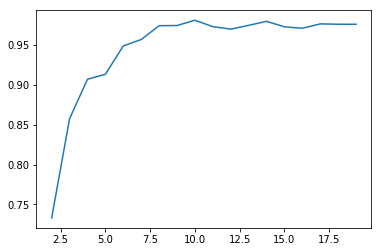

In [147]:
plt.plot(N,Scores)

In [148]:
# from the above work, we can find the dimension 14 is a good choice.

In [149]:
ICA = FastICA(n_components=14,random_state=40) 
X_ICA=ICA.fit_transform(X_n)
X_ICA_labeled=np.vstack((X_ICA[10:30],X_ICA[40:50],X_ICA[120:180],X_ICA[190:560],X_ICA[570:760],X_ICA[770:850]))

In [150]:
# then to avoid overfitting, repeat the random split for 100 times and calculate the mean.
# Can also use cross_valid, but the effect won't be good since there are many classes but little samples, even some class with only 10 
# samples, so the cross_valid is not good here.

In [151]:
summary=0
n=100
for j in range(0,100):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA_labeled,target_labeled, test_size=0.3)
    xgboost.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, xgboost.predict(xIca_test))+summary
a = summary/n
a

0.9772146118721462

In [152]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(xgboost , X_ICA_labeled,target_labeled, cv=35) 
sum(a)/35

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of members in any class cannot be less than n_splits=35.
  % (min_groups, self.n_splits)), Warning)


0.9664265706282512

In [153]:
# Then calculate the time.

In [154]:
import time
start =time.clock()
clf = XGBClassifier(
    n_estimators=30,
    learning_rate =0.4,
    max_depth=4,
    min_child_weight=1,
    gamma=0.3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'multi:softprob',
    nthread=12,
    reg_lambda=1,
    seed=27,
    num_class=7)
# your pragrama
summary=0
n=100
for j in range(0,100):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA_labeled,target_labeled, test_size=0.3)
    clf.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, clf.predict(xIca_test))+summary
a = summary/n

end=time.clock()

print('Running time: %s Seconds'%(end-start))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Running time: 22.930612699999983 Seconds


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [155]:
# For all the work, I also find the the xgboost model a little overfitting, and the parameters can be improved.
# Now we consider this.
# here we use crossvaild method, this is not as good as the method we use before, but it is more convenient and the effect is almost 
# the same in fact.
# here we just show a method of improving xgboost, GBDT, random forest.

In [156]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [157]:
# first try to find the suitable value of n_estimators.
# n_estimatore means the number of trees(group) added, adding these models, the effect will be better.

In [158]:
ICA = FastICA(n_components=14,random_state=40) 
X_ICA=ICA.fit_transform(X_n)
X_ICA_labeled=np.vstack((X_ICA[10:30],X_ICA[40:50],X_ICA[120:180],X_ICA[190:560],X_ICA[570:760],X_ICA[770:850]))

cv_params = {'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100, 110]}
other_params = {"learning_rate": 0.4, "max_depth": 4, "min_child_weight": 1, "gamma": 0.3, "subsample": 0.8, "colsample_bytree": 0.8,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 30, "num_class" : 7}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=35)
optimized_GBM.fit(X_ICA_labeled, target_labeled)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of members in any class cannot be less than n_splits=35.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'n_estimators': 40}
best score:0.9712328767123287


In [159]:
cv_params = {'n_estimators': [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}
other_params = {"learning_rate": 0.4, "max_depth": 4, "min_child_weight": 1, "gamma": 0.3, "subsample": 0.8, "colsample_bytree": 0.8,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 40, "num_class" : 7}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=35)
optimized_GBM.fit(X_ICA_labeled, target_labeled)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of members in any class cannot be less than n_splits=35.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'n_estimators': 40}
best score:0.9712328767123287


In [160]:
# so now I can choose the n_estimator = 40
# The we try to estimate the suitable value of max_depth and min_child_weight.
# max_depth means the maximize deepth of the tree.

In [161]:
cv_params = {'max_depth': [2, 3, 4, 5, 6, 7], 'min_child_weight': [1, 2, 3, 4, 5, 6]}
other_params = {"learning_rate": 0.4, "max_depth": 4, "min_child_weight": 1, "gamma": 0.3, "subsample": 0.8, "colsample_bytree": 0.8,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 40, "num_class" : 7}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=35)
optimized_GBM.fit(X_ICA_labeled, target_labeled)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of members in any class cannot be less than n_splits=35.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'max_depth': 4, 'min_child_weight': 1}
best score:0.9712328767123287


In [162]:
# so now I can choose the max_depth = 4, the min_child_weight = 1.
# Then we try to estimate the best value of gamma.

In [163]:
cv_params = {'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]}
other_params = {"learning_rate": 0.4, "max_depth": 4, "min_child_weight": 1, "gamma": 0.3, "subsample": 0.8, "colsample_bytree": 0.8,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 40, "num_class" : 7}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=35)
optimized_GBM.fit(X_ICA_labeled, target_labeled)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of members in any class cannot be less than n_splits=35.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'gamma': 0.1}
best score:0.9712328767123287


In [164]:
# so now we can choose gamma = 0.1.
# Then we can try to estimate subsample and colsample_bytree.
# for subsample, it use the idea of bagging,a way to improve overfitting.

In [165]:
cv_params = {'subsample': [0.4,0.5,0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
other_params = {"learning_rate": 0.4, "max_depth": 4, "min_child_weight": 1, "gamma": 0.1, "subsample": 0.8, "colsample_bytree": 0.8,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 40, "num_class" : 7}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=35)
optimized_GBM.fit(X_ICA_labeled, target_labeled)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of members in any class cannot be less than n_splits=35.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'colsample_bytree': 0.8, 'subsample': 0.5}
best score:0.9780821917808219


In [166]:
# Then we can choose subsample = 0.5 , and colsample_bytree = 0.8 .
# Next step we try to estimate reg_lambda.

In [167]:
cv_params = {'reg_lambda': [0.05, 0.1, 0.5, 0.8, 1, 1.2, 1.5, 2, 3]}
other_params = {"learning_rate": 0.4, "max_depth": 4, "min_child_weight": 1, "gamma": 0.1, "subsample": 0.5, "colsample_bytree": 0.8,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 40, "num_class" : 7}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=35)
optimized_GBM.fit(X_ICA_labeled, target_labeled)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of members in any class cannot be less than n_splits=35.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'reg_lambda': 1}
best score:0.9780821917808219


In [168]:
# Now the suitablle value of reg_lambda is about 1,
# Next is the last step and I should estimate the suitable value of learning_rate.
# learning_rate means the speed of learning.

In [169]:
cv_params = {'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
other_params = {"learning_rate": 0.4, "max_depth": 4, "min_child_weight": 1, "gamma": 0.1, "subsample": 0.5, "colsample_bytree": 0.8,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 40, "num_class" : 7}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=35)
optimized_GBM.fit(X_ICA_labeled, target_labeled)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of members in any class cannot be less than n_splits=35.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'learning_rate': 0.4}
best score:0.9780821917808219


In [170]:
# so the learning_rate = 0.4 is a good choice.

In [171]:
# Now here is the new classifier model.

In [172]:
Xgboost = XGBClassifier(
    n_estimators=40,
    learning_rate =0.4,
    max_depth=4,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.5,
    colsample_bytree=0.8,
    objective= 'multi:softprob',
    nthread=12,
    reg_lambda=1,
    seed=27,
    num_class = 7)

ICA = FastICA(n_components=14,random_state=40) 
X_ICA=ICA.fit_transform(X_n)
X_ICA_labeled=np.vstack((X_ICA[10:30],X_ICA[40:50],X_ICA[120:180],X_ICA[190:560],X_ICA[570:760],X_ICA[770:850]))

In [173]:
# then we see the accuracy again, but we can find the change can just improve the model a little, the main work is to choose a good
# dimension reducing method and classifier model.

In [174]:
summary=0
n=100
for j in range(0,100):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA_labeled,target_labeled, test_size=0.3)
    Xgboost.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, Xgboost.predict(xIca_test))+summary
average = summary/n
average

0.9831050228310505

In [175]:
# Now after improve the parameters of xgboost model, we can now find the classification accuracy has improved a little(around 0.01).
# Now we can see the accuracy, kappa again, in addition we can also see the confuse matrix and F1 score.
# Now the test accuracy can over 0.98 , the kappa is also around 0.97.

In [176]:
from sklearn.metrics import f1_score
xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA_labeled,target_labeled, test_size=0.3)
Xgboost.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, Xgboost.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, Xgboost.predict(xIca_test)))
print ('Kappa_train：', cohen_kappa_score(yIca_train, Xgboost.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, Xgboost.predict(xIca_test)))
print ('F1_train：', f1_score(yIca_train, Xgboost.predict(xIca_train),average='weighted'))
print ('F1_test：', f1_score(yIca_test, Xgboost.predict(xIca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca_train, Xgboost.predict(xIca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca_test, Xgboost.predict(xIca_test)))

accuracy_train： 1.0
accuracy_test： 0.9817351598173516
Kappa_train： 1.0
Kappa_test： 0.976633769005068
F1_train： 1.0
F1_test： 0.9816081645222817
confusion_matrix_train：
[[135   0   0   0   0   0   0]
 [  0 143   0   0   0   0   0]
 [  0   0  70   0   0   0   0]
 [  0   0   0 109   0   0   0]
 [  0   0   0   0  33   0   0]
 [  0   0   0   0   0  15   0]
 [  0   0   0   0   0   0   6]]
confusion_matrix_test：
[[64  0  0  1  0  0  0]
 [ 0 57  0  0  0  0  0]
 [ 2  0 28  0  0  0  0]
 [ 0  0  0 41  0  0  0]
 [ 0  1  0  0 16  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  4]]


In [177]:
# then let us see how the tree is.

In [178]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [179]:
import xgboost as xgb
import pandas as pd

In [180]:
target_labeled = pd.DataFrame(target_labeled)
target_labeled.columns=["class"]

In [181]:
ICA_X = pd.DataFrame(X_ICA_labeled)
ICA_X.columns = ['W1','W2','W3','W4','W5','W6','W7','W8','W9','W10','W11','W12','W13','W14']

XGBoost = xgb.XGBClassifier(
    n_estimators=40,
    learning_rate =0.4,
    max_depth=4,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.5,
    colsample_bytree=0.8,
    objective= 'multi:softprob',
    nthread=12,
    reg_lambda=1,
    seed=27,
    num_class = 7)

XGBoost.fit(ICA_X,target_labeled)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.4, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=40, n_jobs=12, nthread=12, num_class=7,
       num_parallel_tree=1, objective='multi:softprob', random_state=27,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=None, seed=27,
       subsample=0.5, tree_method='exact', validate_parameters=1,
       verbosity=None)

In [191]:
# see one of the tree in my model.

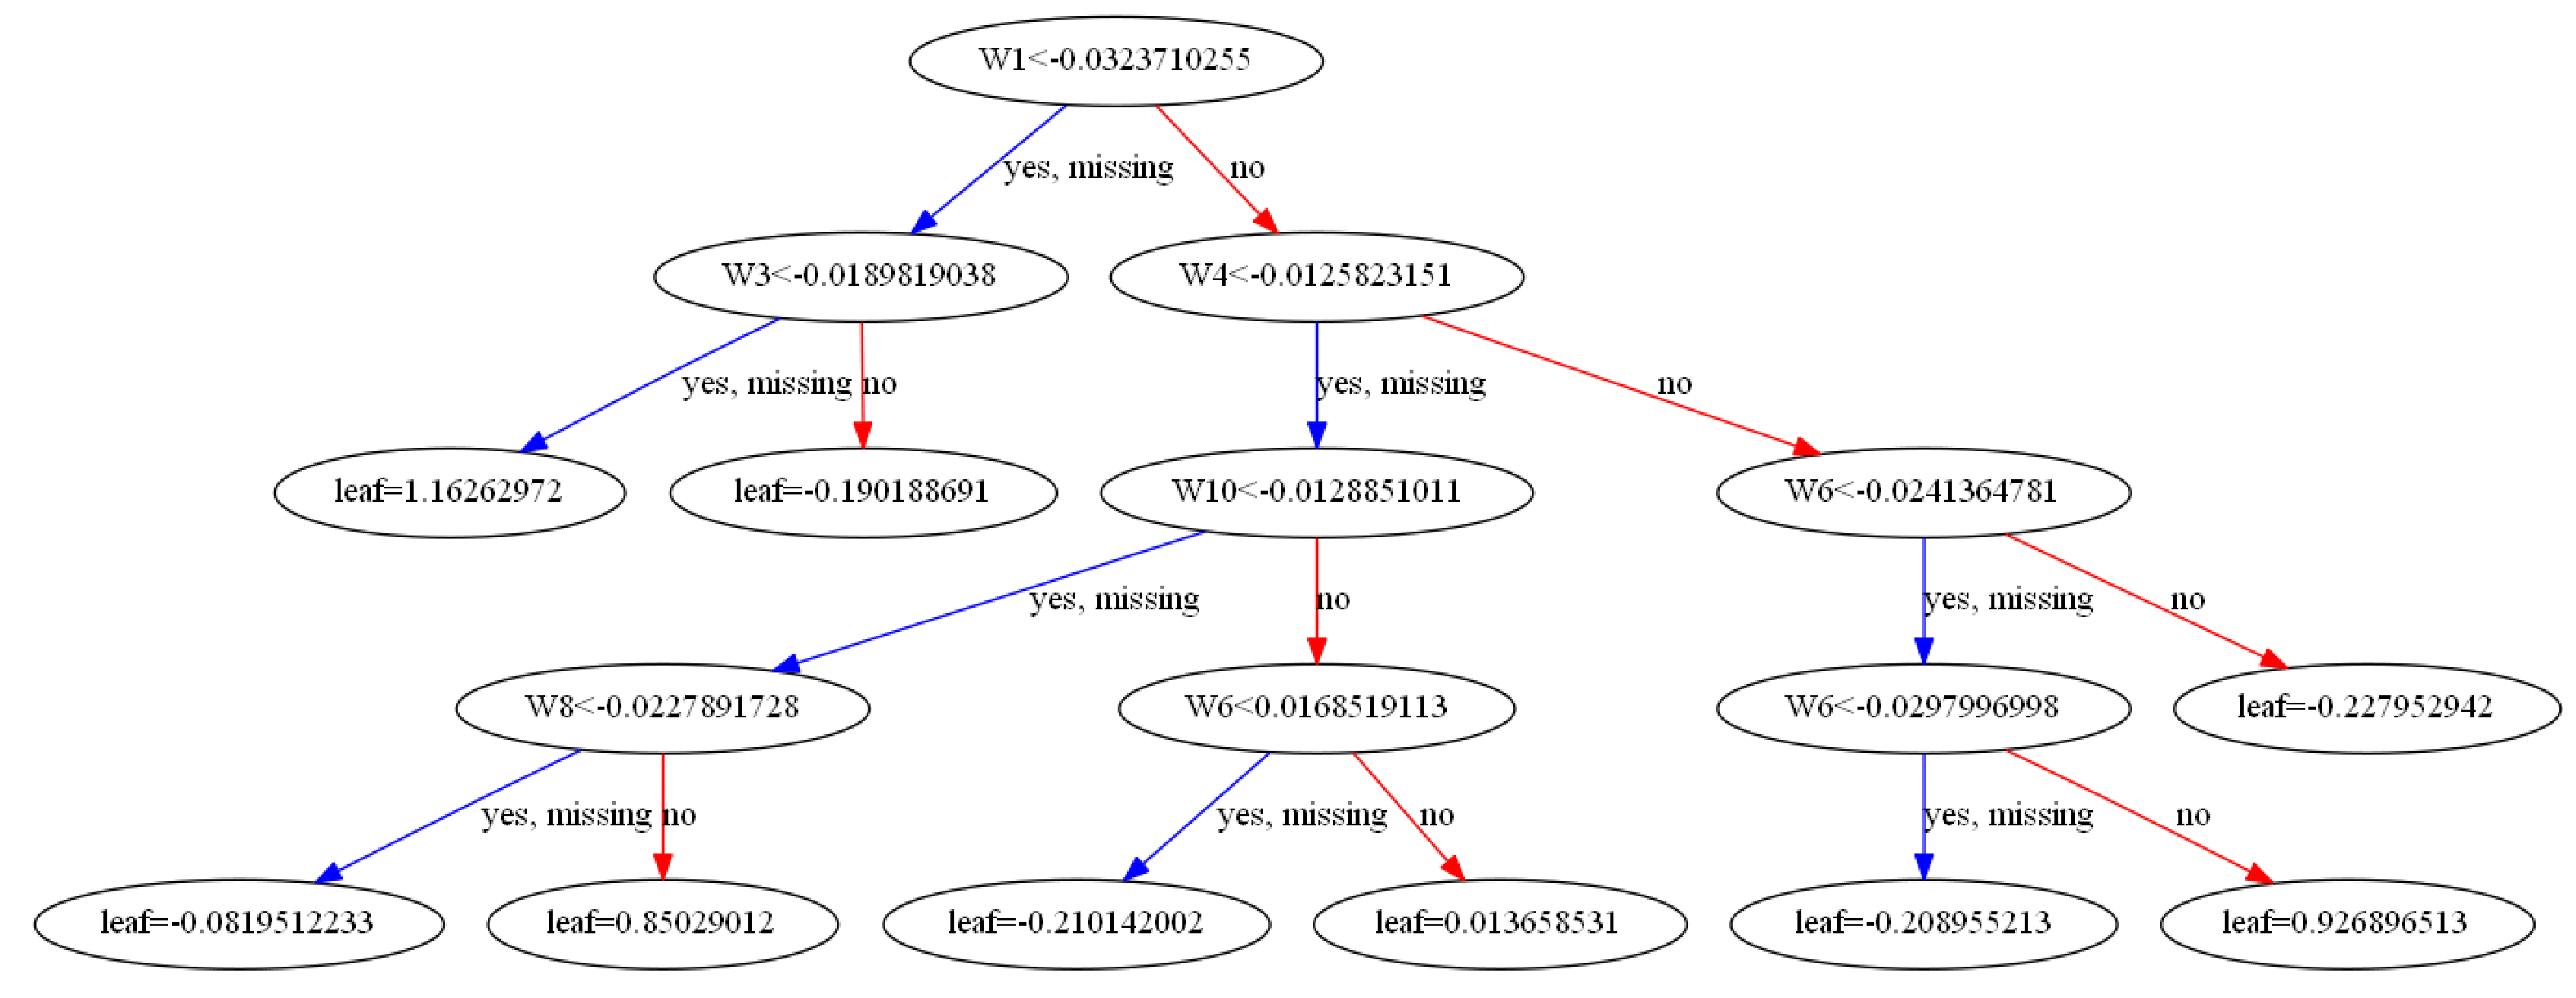

In [182]:
fig,ax = plt.subplots()
fig.set_size_inches(60,40)
xgb.plot_tree(XGBoost,ax = ax,num_trees=2)